#Data Dictionary
* ID	unique ID assigned to each applicant
* 0	loan_amnt	loan amount ($) applied each applicant
* 1	loan_term	Loan duration in years
* 2	interest_rate	Applicable interest rate on Loan in %
* 3	loan_grade	Loan Grade Assigned by the bank
* 4	loan_subgrade	Loan SubGrade Assigned by the bank
* 5	job_experience	Number of years job experience
* 6	home_ownership	Status of House Ownership
* 7	annual_income	Annual income of the applicant
* 8	income_verification_status	Status of Income verification by the bank
* 9	loan_purpose	Purpose of loan
* 10	state_code	State code of the applicant's residence
* 11	debt_to_income	Ratio to total debt to income (total debt might include other loan aswell)
* 12	delinq_2yrs	number of 30+ days delinquency in past 2 years
* 13	public_records	number of legal cases against the applicant
* 14	revolving_balance	total credit revolving balance
* 15	total_acc	total number of credit lines available in members credit line
* 16	interest_receive	total interest received by the bank on the loan
* 17	application_type	Whether the applicant has applied the loan by creating individuall or joint account
* 18	last_week_pay	How many months have the applicant paid the loan EMI already
* 19	total_current_balance	total current balance of all the accounts of applicant
* 20	total_revolving_limit	total revolving credit limit
* 21	status of loan amount, 1 = Defaulter, 0 = Non Defaulters


# Import Libraries


In [ ]:
#reading and manipulating data
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for imputing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#special character treatment
import re

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#models and metrics
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#kfolds and cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#pipeline
from sklearn.pipeline import Pipeline

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

#more decision tree stuff
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#neural network items
import time
import keras
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
#a global random seed was set to 812 to ensure reproducibility
keras.utils.set_random_seed(812)

tf.config.experimental.enable_op_determinism()

# Loading Dataset

In [ ]:
#google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data dictionary
data_dictionary = pd.read_csv('/content/drive/My Drive/AI Cert Course/Hackathons/Loan Default/Data_Dictionary.csv')

# Data Overview

In [ ]:
#show full contents of each row
pd.set_option('display.max_colwidth', None)

In [ ]:
data_dictionary.head(25)

ID  \
0                    loan_amnt   
1                    loan_term   
2                interest_rate   
3                   loan_grade   
4                loan_subgrade   
5               job_experience   
6               home_ownership   
7                annual_income   
8   income_verification_status   
9                 loan_purpose   
10                  state_code   
11              debt_to_income   
12                 delinq_2yrs   
13              public_records   
14           revolving_balance   
15                   total_acc   
16            interest_receive   
17            application_type   
18               last_week_pay   
19       total_current_balance   
20       total_revolving_limit   
21                     default   

                                                   unique ID assigned to each applicant  
0                                                loan amount ($) applied each applicant  
1                                                                Loan duration in years  
2                                                 Applicable interest rate on Loan in %  
3                                                       Loan Grade Assigned by the bank  
4                                                    Loan SubGrade Assigned by the bank  
5                                                       Number of years job experience   
6                                                             Status of House Ownership  
7                                                        Annual income of the applicant  
8                                             Status of Income verification by the bank  
9                                                                       Purpose of loan  
10                                             State code of the applicant's residence   
11           Ratio to total debt to income (total debt might include other loan aswell)  
12                                       number of 30+ days delinquency in past 2 years  
13                                          number of legal cases against the applicant  
14                                                       total credit revolving balance  
15                        total number of credit lines available in members credit line  
16                                      total interest received by the bank on the loan  
17  Whether the applicant has applied the loan by creating individuall or joint account  
18                         How many months have the applicant paid the loan EMI already  
19                               total current balance of all the accounts of applicant  
20                                                         total revolving credit limit  
21                             status of loan amount, 1 = Defaulter, 0 = Non Defaulters

In [ ]:
#read data -- train
data = pd.read_csv('/content/drive/My Drive/AI Cert Course/Hackathons/Loan Default/Train_set.csv')

In [ ]:
#read data -- test
test_raw = pd.read_csv('/content/drive/My Drive/AI Cert Course/Hackathons/Loan Default/Test_set.csv')

In [ ]:
data.head()

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade  \
0  72199369       9000   3 years           9.17          B            B2   
1  14257956      18000   3 years          13.65          C            C1   
2  66216451      16000   3 years           7.26          A            A4   
3  46974169      25000   3 years          13.99          C            C4   
4  46725961      17000   3 years           6.39          A            A2   

  job_experience home_ownership  annual_income income_verification_status  \
0       <5 Years            OWN        85000.0               Not Verified   
1       <5 Years            OWN        64000.0                   Verified   
2       <5 Years       MORTGAGE       150000.0            Source Verified   
3            NaN       MORTGAGE        59800.0                   Verified   
4      10+ years       MORTGAGE        72000.0            Source Verified   

   ... delinq_2yrs public_records  revolving_balance  total_acc  \
0  ...         0.0            0.0              39519       20.0   
1  ...         0.0            1.0               9783       24.0   
2  ...         2.0            0.0              13641       27.0   
3  ...         0.0            0.0              35020       35.0   
4  ...         0.0            0.0              23990       26.0   

   interest_receive  application_type  last_week_pay  total_current_balance  \
0             59.60        INDIVIDUAL            4.0                95493.0   
1           3348.25        INDIVIDUAL           95.0               185433.0   
2            276.69        INDIVIDUAL           13.0               180519.0   
3           1106.72        INDIVIDUAL           17.0               183208.0   
4            725.29        INDIVIDUAL           39.0                23990.0   

  total_revolving_limit  default  
0               84100.0        0  
1               13500.0        0  
2               19300.0        0  
3               55400.0        0  
4               81300.0        0  

[5 rows x 23 columns]

In [ ]:
test_raw.head()

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade  \
0   4855329      12000   3 years          15.31          C            C2   
1  66862420      12000   3 years           7.26          A            A4   
2   3637416      15000   3 years          14.33          C            C1   
3  53682249      12000   3 years           9.99          B            B3   
4  53937165      20150   3 years          11.53          B            B5   

  job_experience home_ownership  annual_income income_verification_status  \
0       <5 Years       MORTGAGE        73400.0               Not Verified   
1      10+ years       MORTGAGE       105000.0               Not Verified   
2     6-10 years       MORTGAGE        50000.0                   Verified   
3     6-10 years           RENT        37000.0            Source Verified   
4       <5 Years           RENT        75000.0            Source Verified   

   ... debt_to_income delinq_2yrs  public_records  revolving_balance  \
0  ...          14.62         0.0             0.0              22156   
1  ...          11.38         0.0             0.0               7592   
2  ...          28.15         0.0             1.0              17983   
3  ...          34.32         0.0             0.0              12262   
4  ...          26.74         1.0             0.0               8251   

   total_acc  interest_receive  application_type  last_week_pay  \
0       30.0           2290.24        INDIVIDUAL           87.0   
1       14.0            202.68        INDIVIDUAL           13.0   
2       19.0           1166.24        INDIVIDUAL           30.0   
3       18.0            635.06        INDIVIDUAL           35.0   
4       11.0           1232.84        INDIVIDUAL           31.0   

  total_current_balance  total_revolving_limit  
0              128098.0                25800.0  
1              269396.0                23600.0  
2              220135.0                34100.0  
3               39436.0                21700.0  
4               52764.0                12000.0  

[5 rows x 22 columns]

In [ ]:
df = data.copy()

In [ ]:
df.head()

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade  \
0  72199369       9000   3 years           9.17          B            B2   
1  14257956      18000   3 years          13.65          C            C1   
2  66216451      16000   3 years           7.26          A            A4   
3  46974169      25000   3 years          13.99          C            C4   
4  46725961      17000   3 years           6.39          A            A2   

  job_experience home_ownership  annual_income income_verification_status  \
0       <5 Years            OWN        85000.0               Not Verified   
1       <5 Years            OWN        64000.0                   Verified   
2       <5 Years       MORTGAGE       150000.0            Source Verified   
3            NaN       MORTGAGE        59800.0                   Verified   
4      10+ years       MORTGAGE        72000.0            Source Verified   

   ... delinq_2yrs public_records  revolving_balance  total_acc  \
0  ...         0.0            0.0              39519       20.0   
1  ...         0.0            1.0               9783       24.0   
2  ...         2.0            0.0              13641       27.0   
3  ...         0.0            0.0              35020       35.0   
4  ...         0.0            0.0              23990       26.0   

   interest_receive  application_type  last_week_pay  total_current_balance  \
0             59.60        INDIVIDUAL            4.0                95493.0   
1           3348.25        INDIVIDUAL           95.0               185433.0   
2            276.69        INDIVIDUAL           13.0               180519.0   
3           1106.72        INDIVIDUAL           17.0               183208.0   
4            725.29        INDIVIDUAL           39.0                23990.0   

  total_revolving_limit  default  
0               84100.0        0  
1               13500.0        0  
2               19300.0        0  
3               55400.0        0  
4               81300.0        0  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [ ]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [ ]:
df.shape

(93174, 23)

In [ ]:
test_raw.shape

(39933, 22)

In [ ]:
df.describe(include='all').T

count unique                 top   freq  \
ID                          93174.0    NaN                 NaN    NaN   
loan_amnt                   93174.0    NaN                 NaN    NaN   
loan_term                     93174      2             3 years  65211   
interest_rate               93174.0    NaN                 NaN    NaN   
loan_grade                    93174      7                   B  26865   
loan_subgrade                 93174     35                  B4   5879   
job_experience                88472      3            <5 Years  40610   
home_ownership                93174      5            MORTGAGE  46445   
annual_income               93173.0    NaN                 NaN    NaN   
income_verification_status    93174      3     Source Verified  34487   
loan_purpose                  93174      4  debt_consolidation  55241   
state_code                    93174     50                  CA  13744   
debt_to_income              93174.0    NaN                 NaN    NaN   
delinq_2yrs                 93172.0    NaN                 NaN    NaN   
public_records              93172.0    NaN                 NaN    NaN   
revolving_balance           93174.0    NaN                 NaN    NaN   
total_acc                   93172.0    NaN                 NaN    NaN   
interest_receive            93174.0    NaN                 NaN    NaN   
application_type              93174      2          INDIVIDUAL  93118   
last_week_pay               91250.0    NaN                 NaN    NaN   
total_current_balance       85788.0    NaN                 NaN    NaN   
total_revolving_limit       85788.0    NaN                 NaN    NaN   
default                     93174.0    NaN                 NaN    NaN   

                                       mean              std      min  \
ID                          35050211.389476  24149262.073938  70735.0   
loan_amnt                      14733.861378      8428.184858    500.0   
loan_term                               NaN              NaN      NaN   
interest_rate                     13.233433         4.368728     5.32   
loan_grade                              NaN              NaN      NaN   
loan_subgrade                           NaN              NaN      NaN   
job_experience                          NaN              NaN      NaN   
home_ownership                          NaN              NaN      NaN   
annual_income                  75028.258559     69454.783994   1200.0   
income_verification_status              NaN              NaN      NaN   
loan_purpose                            NaN              NaN      NaN   
state_code                              NaN              NaN      NaN   
debt_to_income                    18.127623         8.563084      0.0   
delinq_2yrs                        0.316994         0.880859      0.0   
public_records                     0.196121         0.581188      0.0   
revolving_balance              16854.468511     23689.073887      0.0   
total_acc                         25.248905        11.855061      1.0   
interest_receive                 1747.26353      2088.236141      0.0   
application_type                        NaN              NaN      NaN   
last_week_pay                     58.154882         44.32656      0.0   
total_current_balance         139252.923288    157686.790921      0.0   
total_revolving_limit          32085.902889     47052.514708      0.0   
default                            0.237502         0.425555      0.0   

                                   25%         50%         75%         max  
ID                          10859832.5  37107507.0  58598949.5  73519746.0  
loan_amnt                       8000.0     13000.0     20000.0     35000.0  
loan_term                          NaN         NaN         NaN         NaN  
interest_rate                     9.99       12.99        16.2       28.99  
loan_grade                         NaN         NaN         NaN         NaN  
loan_subgrade                      NaN         NaN         NaN

In [ ]:
test_raw.describe(include='all').T

count unique                 top   freq  \
ID                          39933.0    NaN                 NaN    NaN   
loan_amnt                   39933.0    NaN                 NaN    NaN   
loan_term                     39933      2             3 years  28110   
interest_rate               39933.0    NaN                 NaN    NaN   
loan_grade                    39933      7                   B  11551   
loan_subgrade                 39933     35                  B3   2547   
job_experience                37844      3            <5 Years  17290   
home_ownership                39933      5            MORTGAGE  20008   
annual_income               39933.0    NaN                 NaN    NaN   
income_verification_status    39933      3     Source Verified  14780   
loan_purpose                  39933      4  debt_consolidation  23473   
state_code                    39933     50                  CA   5931   
debt_to_income              39933.0    NaN                 NaN    NaN   
delinq_2yrs                 39932.0    NaN                 NaN    NaN   
public_records              39932.0    NaN                 NaN    NaN   
revolving_balance           39933.0    NaN                 NaN    NaN   
total_acc                   39932.0    NaN                 NaN    NaN   
interest_receive            39933.0    NaN                 NaN    NaN   
application_type              39933      2          INDIVIDUAL  39909   
last_week_pay               39127.0    NaN                 NaN    NaN   
total_current_balance       36703.0    NaN                 NaN    NaN   
total_revolving_limit       36703.0    NaN                 NaN    NaN   

                                       mean              std      min  \
ID                          34811489.369719  24217502.295129  74301.0   
loan_amnt                      14781.987329      8427.845431    500.0   
loan_term                               NaN              NaN      NaN   
interest_rate                     13.219258         4.392109     5.32   
loan_grade                              NaN              NaN      NaN   
loan_subgrade                           NaN              NaN      NaN   
job_experience                          NaN              NaN      NaN   
home_ownership                          NaN              NaN      NaN   
annual_income                  75264.800303     56556.664434   3300.0   
income_verification_status              NaN              NaN      NaN   
loan_purpose                            NaN              NaN      NaN   
state_code                              NaN              NaN      NaN   
debt_to_income                    18.121058         8.487992      0.0   
delinq_2yrs                        0.312256         0.854545      0.0   
public_records                     0.191526         0.557824      0.0   
revolving_balance              17019.281096     26129.744796      0.0   
total_acc                         25.264825        11.768501      1.0   
interest_receive                1764.743917      2095.443444      0.0   
application_type                        NaN              NaN      NaN   
last_week_pay                     58.418177         44.47613      0.0   
total_current_balance         140462.513609    156575.925283      0.0   
total_revolving_limit          32453.212762     61835.445155      0.0   

                                   25%         50%         75%         max  
ID                          10751721.0  36805086.0  58459985.0  73519693.0  
loan_amnt                       8000.0     13000.0     20000.0     35000.0  
loan_term                          NaN         NaN         NaN         NaN  
interest_rate                     9.99       12.99        16.2       28.99  
loan_grade                         NaN         NaN         NaN         NaN  
loan_subgrade                      NaN         NaN         NaN         NaN  
job_experience                     NaN         NaN         NaN         NaN  
home_ownership                     NaN         NaN    

There's no default column in the test set.

In [ ]:
int(df.duplicated().sum())

0

In [ ]:
int(test_raw.duplicated().sum())

0

No duplicates

In [ ]:
df['ID'].nunique()

93174

In [ ]:
test_raw['ID'].nunique()

39933

All the entries are indeed unique

In [ ]:
#turn the IDs into strings, since they're basically acting like customer names
df['ID'] = df['ID'].astype(str)

In [ ]:
#turn the IDs into strings, since they're basically acting like customer names
test_raw['ID'] = test_raw['ID'].astype(str)

In [ ]:
#check conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  object 
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

We have 10 object columns, 10 float64 columns, and 3 int64 columns (13 numeric)

In [ ]:
#check conversion
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  object 
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [ ]:
#checking string var vals
df['loan_term'].value_counts()

loan_term
3 years    65211
5 years    27963
Name: count, dtype: int64

In [ ]:
df['loan_grade'].value_counts()

loan_grade
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: count, dtype: int64

In [ ]:
df['loan_subgrade'].value_counts()

loan_subgrade
B4    5879
B3    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: count, dtype: int64

In [ ]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: count, dtype: int64

In [ ]:
#checking job experience values
df['job_experience'].value_counts()

job_experience
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: count, dtype: int64

In [ ]:
#checking income verification values
df['income_verification_status'].value_counts()

income_verification_status
Source Verified    34487
Verified           30450
Not Verified       28237
Name: count, dtype: int64

In [ ]:
df['loan_purpose'].value_counts()

loan_purpose
debt_consolidation    55241
credit_card           21571
other                 10971
home_improvement       5391
Name: count, dtype: int64

In [ ]:
df['state_code'].value_counts()

state_code
CA    13744
NY     7782
TX     7467
FL     6360
IL     3699
NJ     3464
PA     3321
OH     3104
GA     2998
VA     2793
NC     2669
MI     2415
MD     2279
MA     2232
AZ     2115
WA     2038
CO     1924
MN     1638
MO     1485
IN     1420
CT     1402
TN     1365
NV     1326
WI     1206
AL     1188
LA     1112
SC     1108
OR     1102
KY      933
OK      851
KS      800
AR      694
UT      658
NM      507
WV      460
HI      451
NH      447
RI      412
MS      389
DC      271
MT      253
DE      246
AK      231
WY      212
SD      198
VT      174
NE      126
ME       59
ND       45
ID        1
Name: count, dtype: int64

In [ ]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    93118
JOINT            56
Name: count, dtype: int64

 string vars:

* 2   loan_term                   93174 non-null  object - it's fine
* 4   loan_grade                  93174 non-null  object - it's fine
* 5   loan_subgrade               93174 non-null  object - it's fine
* 6   job_experience              88472 non-null  object - it's fine
* 7   home_ownership              93174 non-null  object - it's fine
* 9   income_verification_status  93174 non-null  object - it's fine
* 10  loan_purpose                93174 non-null  object - it's fine
* 11  state_code                  93174 non-null  object - it's fine
* 18  application_type            93174 non-null  object


# Exploratory Data Analysis

## All Numeric Features

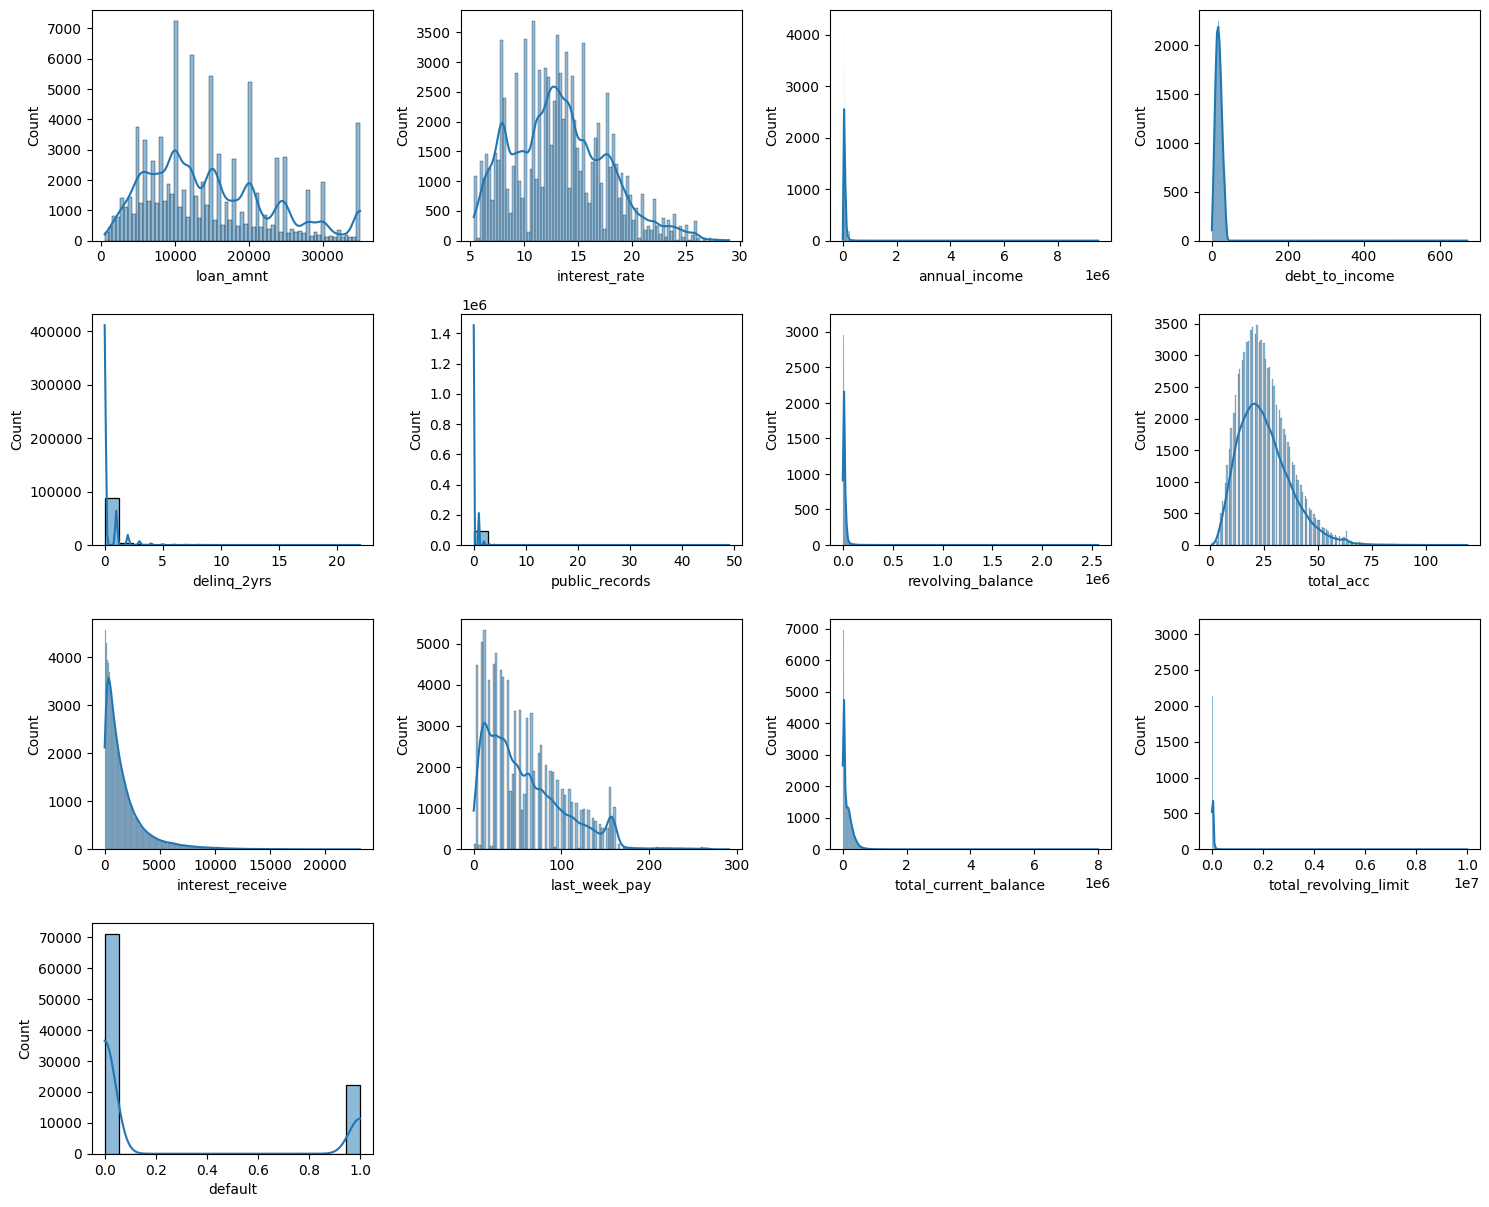

In [ ]:
# create wide area for histplots
plt.figure(figsize=(15, 30))

# define list of variables to plot
numeric_features = df.select_dtypes(exclude = ['object']).columns.tolist()

# create histplots
for i, feature in enumerate(numeric_features):
    plt.subplot(10, 4, i+1)
    sns.histplot(data=df, x=feature, kde=True)

plt.tight_layout();   #add spacing between plots
plt.show()

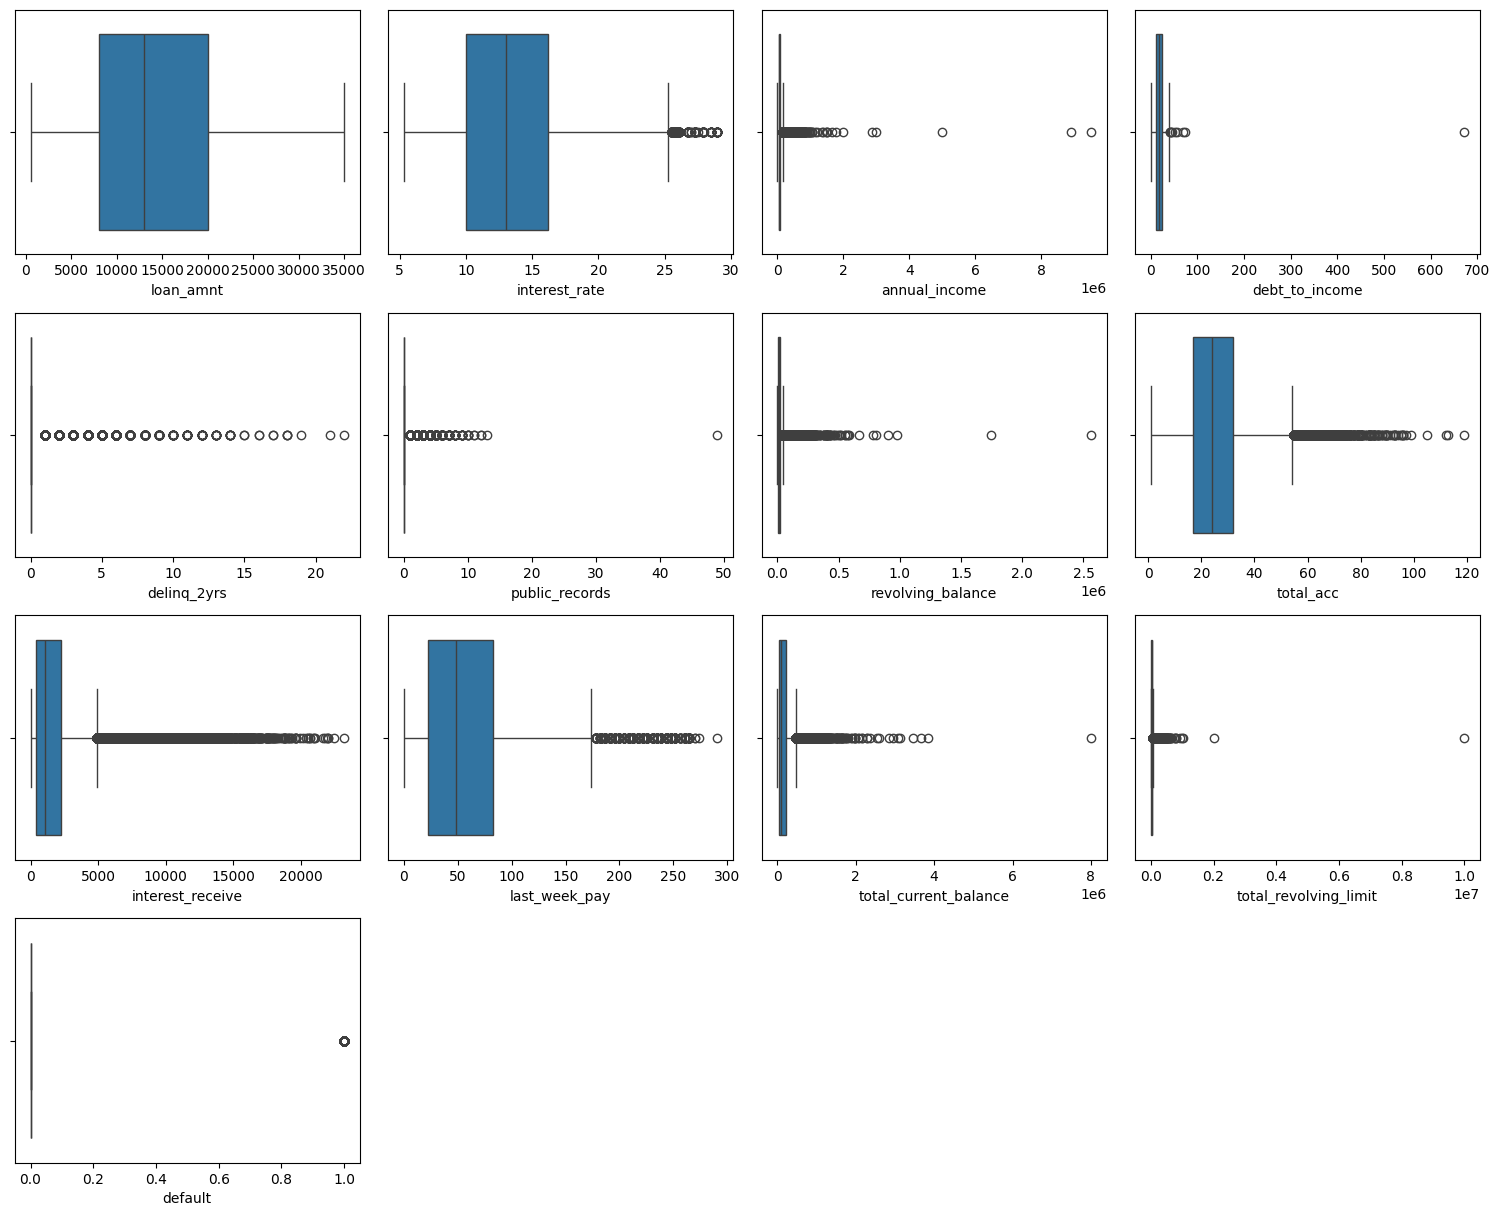

In [ ]:
# create wide area for histplots
plt.figure(figsize=(15, 30))

# create boxplots
for i, feature in enumerate(numeric_features):
    plt.subplot(10, 4, i+1)
    sns.boxplot(data=df, x=feature)

plt.tight_layout();   #add spacing between plots
plt.show()

## Categorical Features

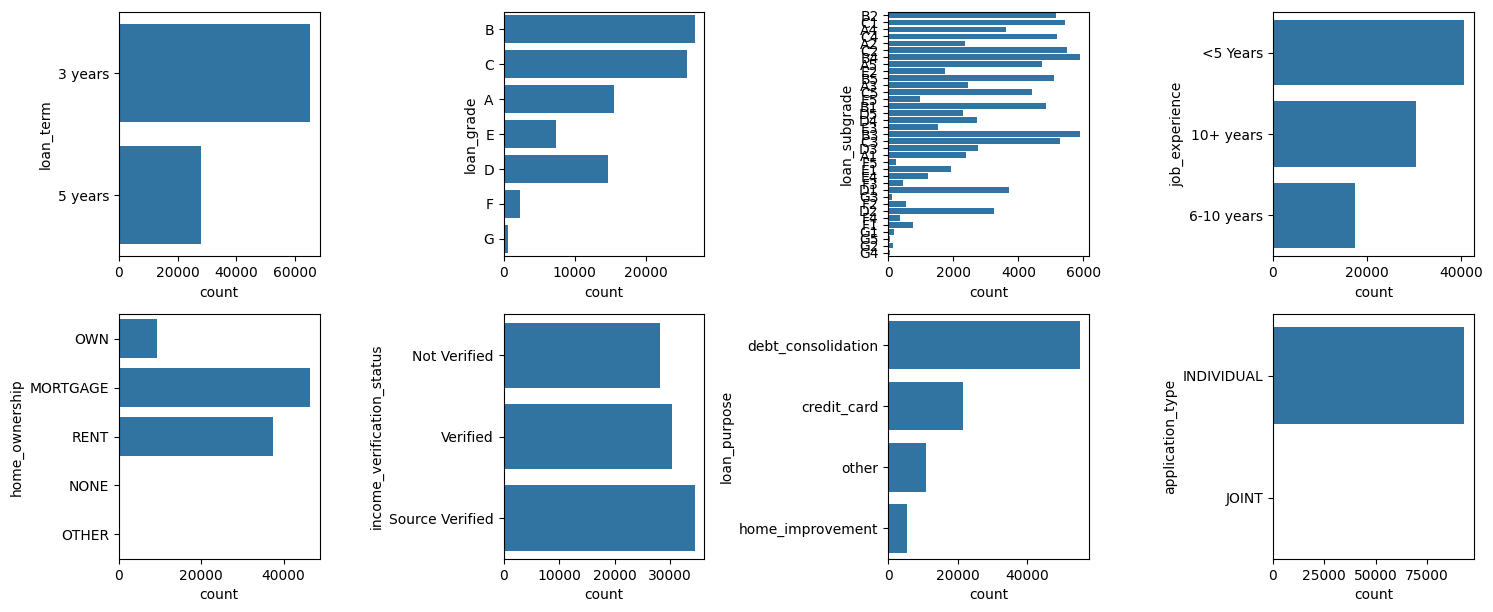

In [ ]:
# create wide area for countplots
plt.figure(figsize=(15, 30))

# define list of variables to plot
cat_features = df.select_dtypes(exclude = ['number']).columns.tolist()
cat_features.remove('ID') #ID column isn't informative
cat_features.remove('state_code') #we'll plot state code separately

# create histplots
for i, feature in enumerate(cat_features):
    plt.subplot(10, 4, i+1)
    sns.countplot(data=df, y=feature)

plt.tight_layout();   #add spacing between plots
plt.show()

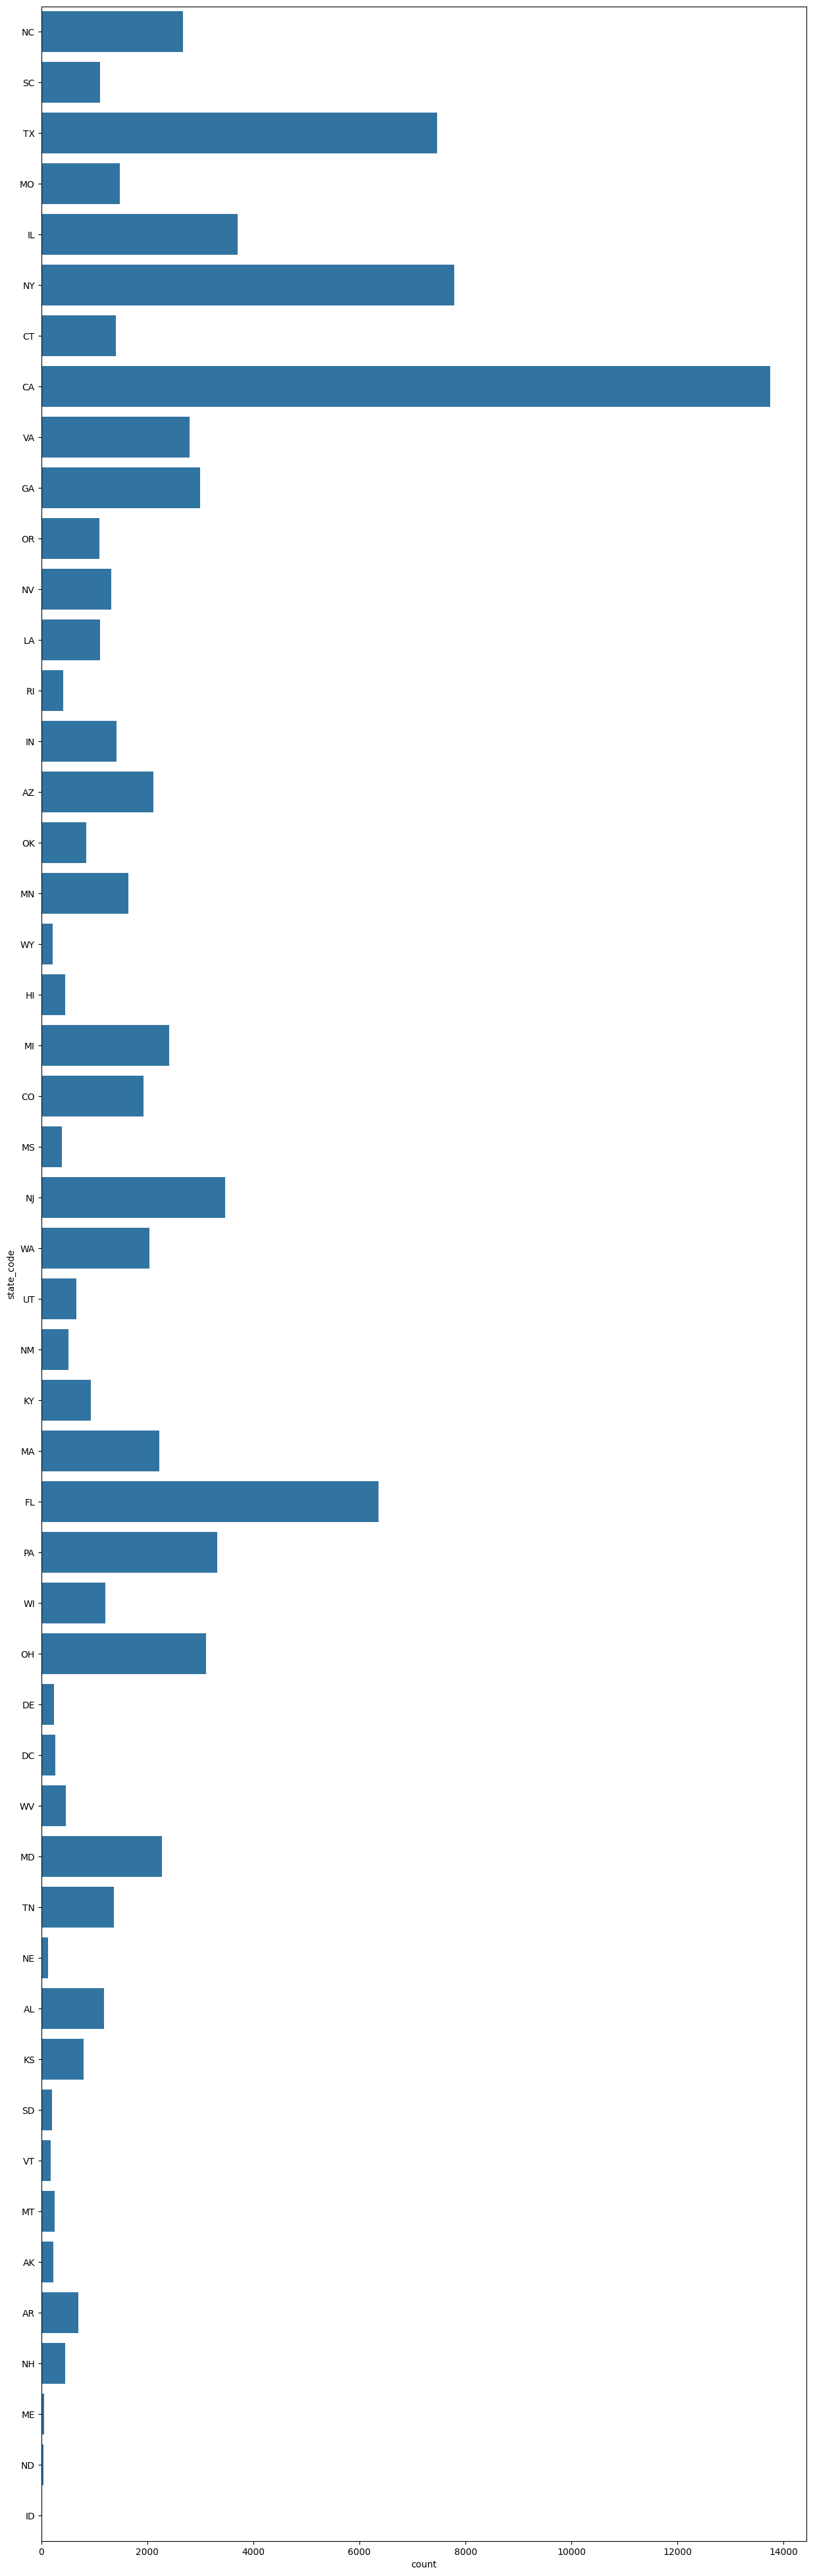

In [ ]:
#make the state_code plot look less crazy
plt.figure(figsize = (15, 50))
sns.countplot(data=df, y='state_code')
plt.show()

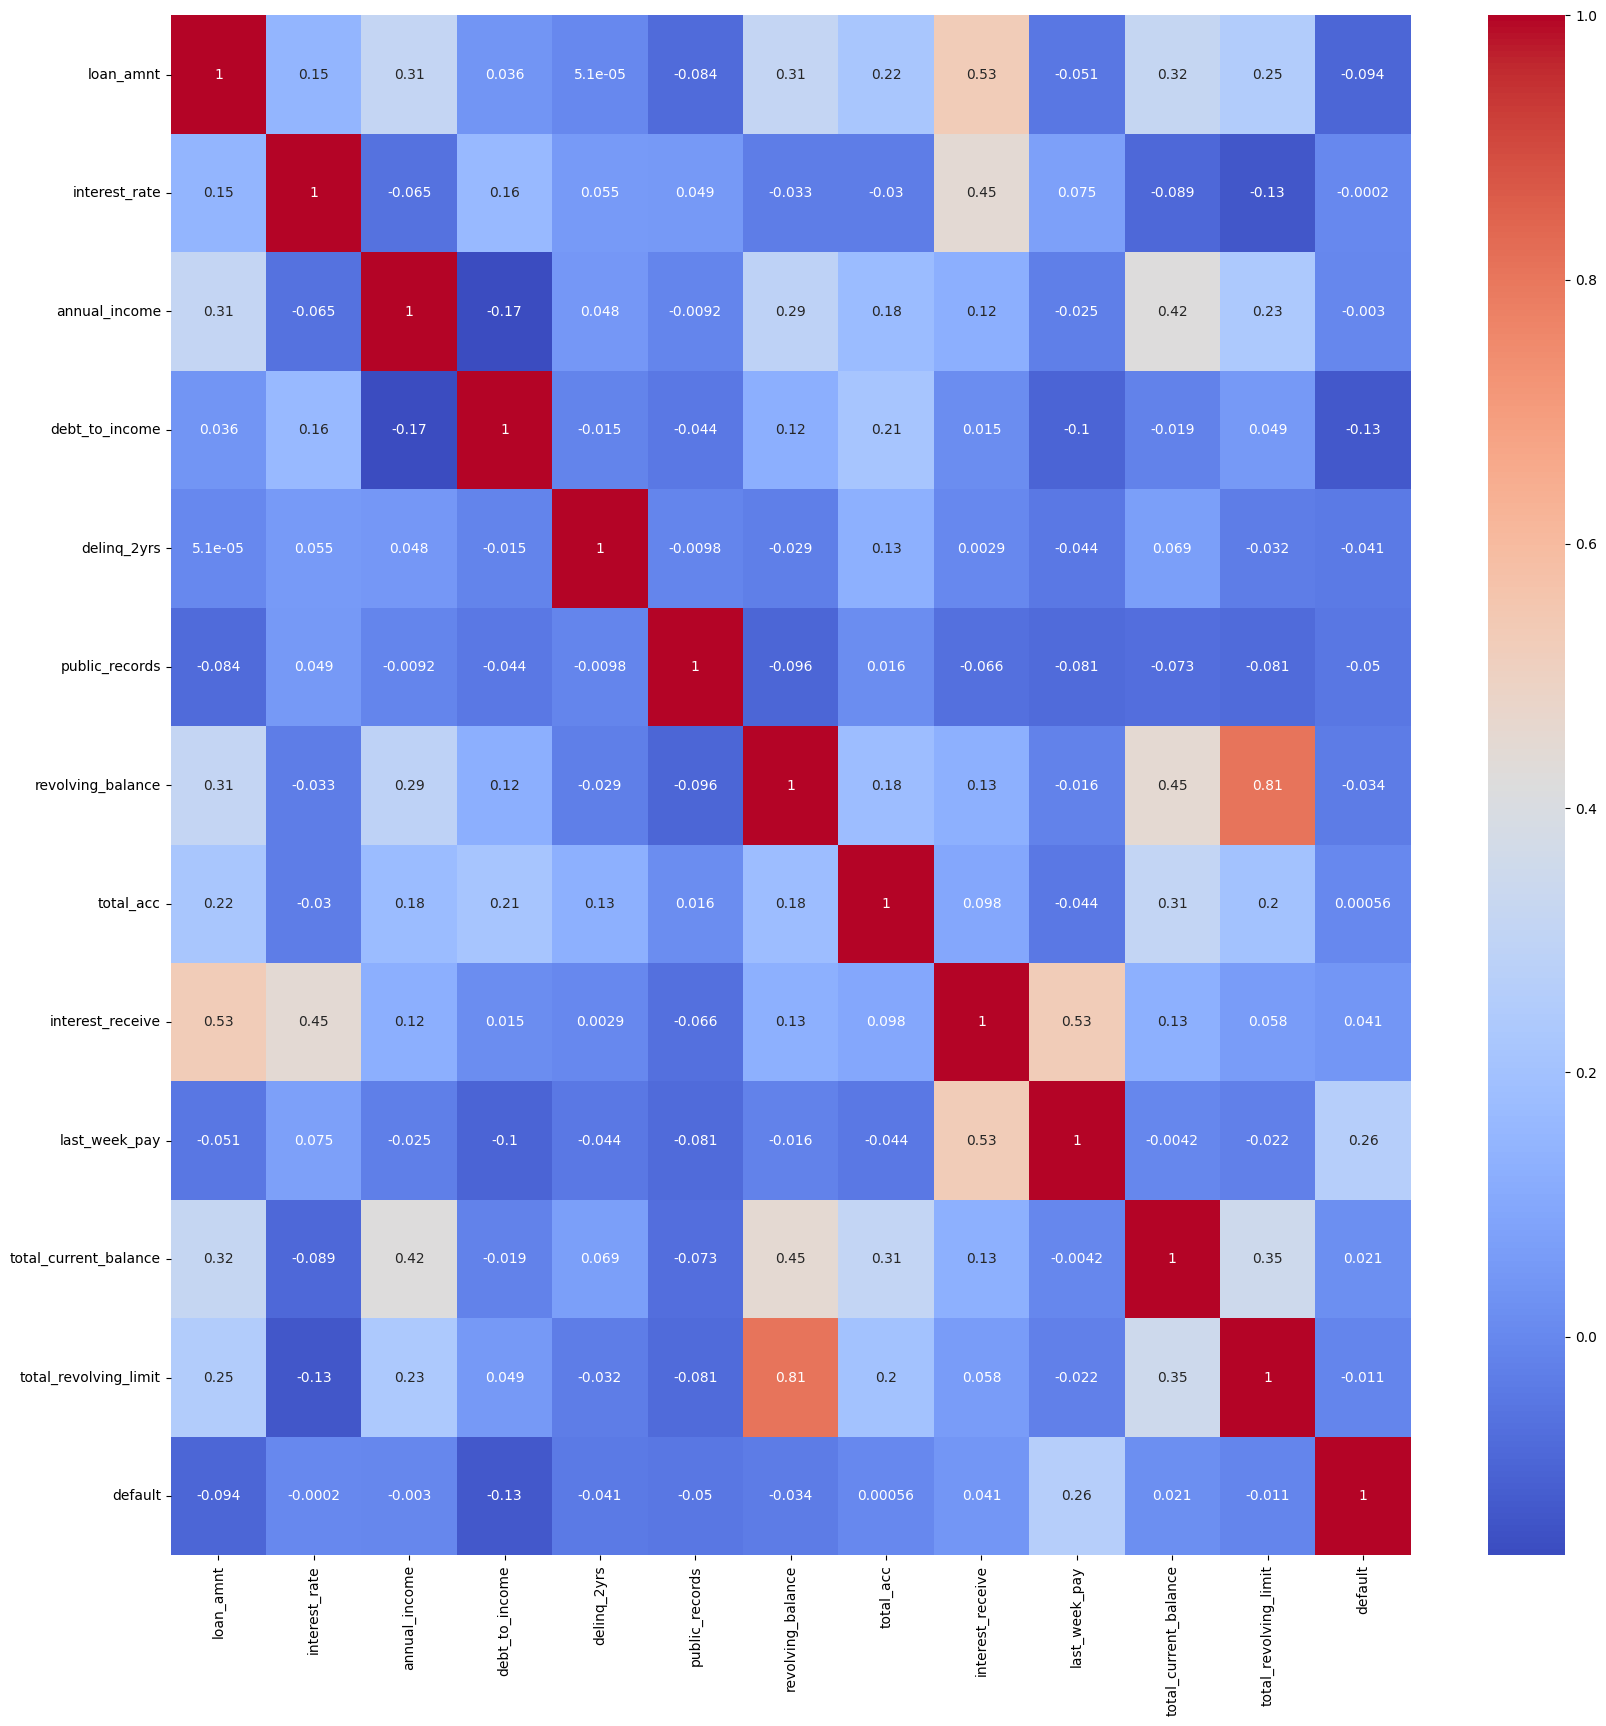

In [ ]:
#make the heatmap
plt.figure(figsize = (20, 20))
corr = df[numeric_features].corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '.2g');

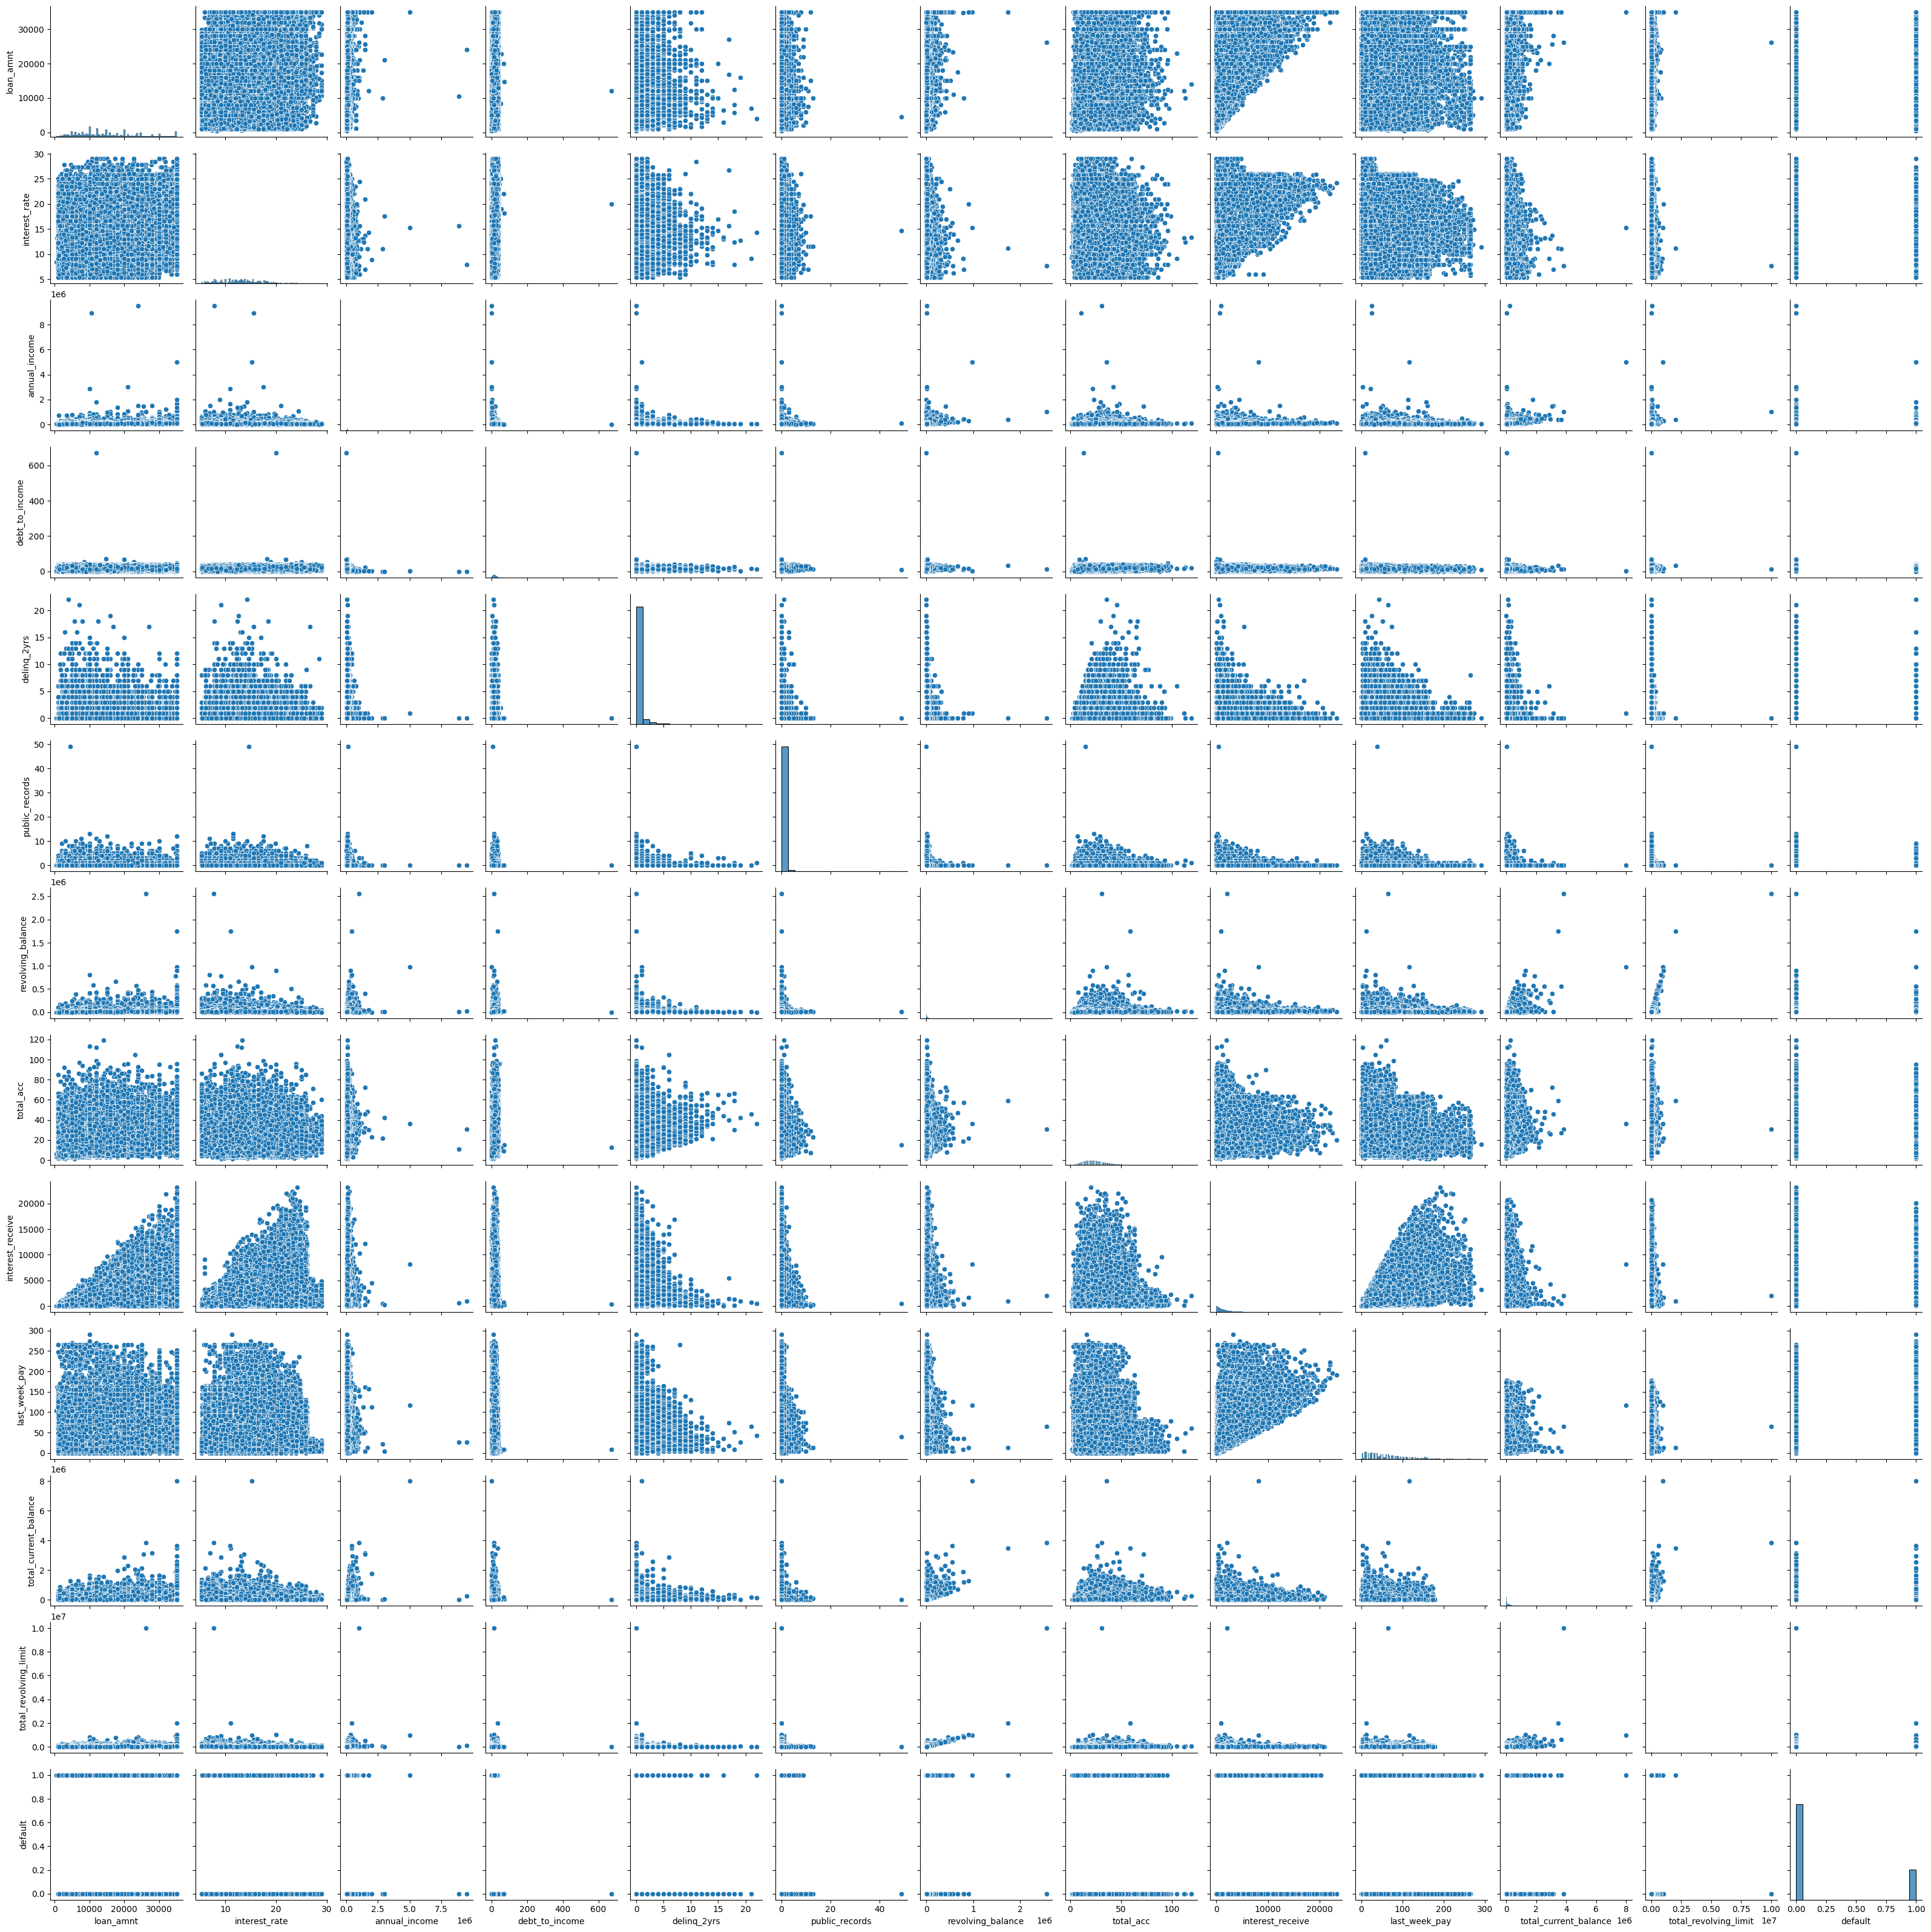

In [ ]:
#pairplots
sns.pairplot(data=df, vars = numeric_features);

In [ ]:
#check how many of each value there is in the labels csv
df['default'].value_counts()

default
0    71045
1    22129
Name: count, dtype: int64

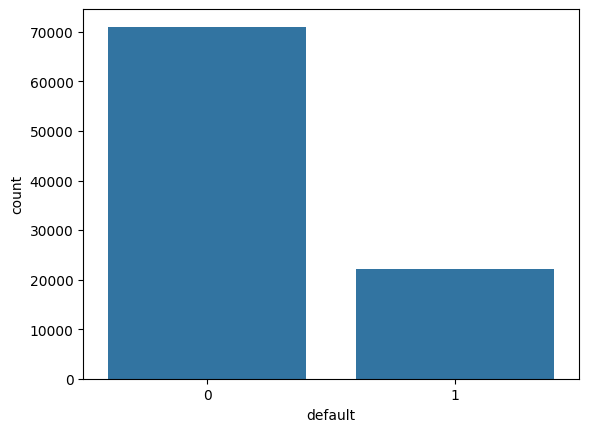

In [ ]:
#visual representation of instances per class
sns.countplot(data=df, x='default');

Per data dictionary, 1 is a defaulter and 0 is a non-defaulter. The dataset is skewed toward non-defaulters.

# Data Preprocessing

## Split the dataset

In [ ]:
#drop ID columns
df.drop(['ID'], axis = 1, inplace = True)

In [ ]:
#drop ID columns
test = test_raw.drop(['ID'], axis = 1)

In [ ]:
#split training set into train and val before imputing missing vals,
#to prevent data leakage
#set up X and y
X = df.drop(['default'], axis = 1)
y = df['default']

In [ ]:
#split training set into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y)

In [ ]:
#see how it looks
print(X_train.shape, X_val.shape)

(65221, 21) (27953, 21)


## Missing Value Treatment

In [ ]:
#pulling in our function to make histplots/boxplots together

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Mean is the green dotted line, and median is the black solid line.

In [ ]:
X_train.isnull().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                3313
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                 1360
total_current_balance         5215
total_revolving_limit         5215
dtype: int64

In [ ]:
X_val.isnull().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                1389
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  564
total_current_balance         2171
total_revolving_limit         2171
dtype: int64

In [ ]:
test.isnull().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [ ]:
#dataframe showing percentage of missing values
pd.DataFrame({'Count':X_train.isnull().sum()[X_train.isnull().sum()>0],'Percentage':(X_train.isnull().sum()[X_train.isnull().sum()>0]/X_train.shape[0])*100})

Count  Percentage
job_experience          3313    5.079652
annual_income              1    0.001533
delinq_2yrs                1    0.001533
public_records             1    0.001533
total_acc                  1    0.001533
last_week_pay           1360    2.085218
total_current_balance   5215    7.995891
total_revolving_limit   5215    7.995891

Vars with missing vals:
* job_experience
* annual_income
* delinq_2yrs
* public_records
* total_acc
* last_week_pay
* total_current_balance
* total_revolving_limit

3-10 EDA Uni and Bivariate

**How to treat missing values?**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

* Other methods include k-NN, MICE, SMOTE, deep learning, ...

How to handle the null values:
* job_experience
* annual_income
* delinq_2yrs
* public_records
* total_acc
* last_week_pay
* total_current_balance
* total_revolving_limit

### job_experience

<Axes: xlabel='count', ylabel='job_experience'>

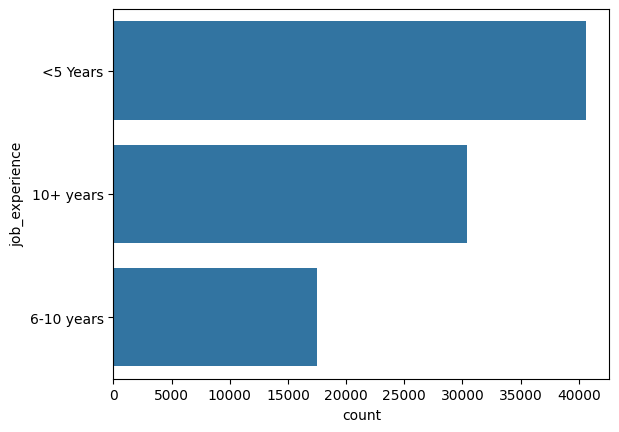

In [ ]:
sns.countplot(data = df, y = 'job_experience')

job_experience is a categorical var -- so we should use mode.

### annual_income


In [ ]:
#correlation matrix of all numeric features
correlation_matrix = df[numeric_features].corr()

In [ ]:
#isolate var
target_var = 'annual_income'
single_variable_correlations = correlation_matrix[[target_var]]

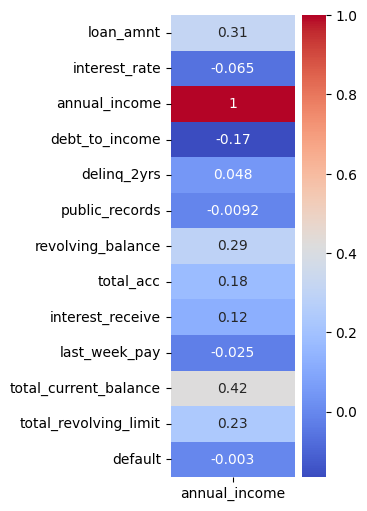

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

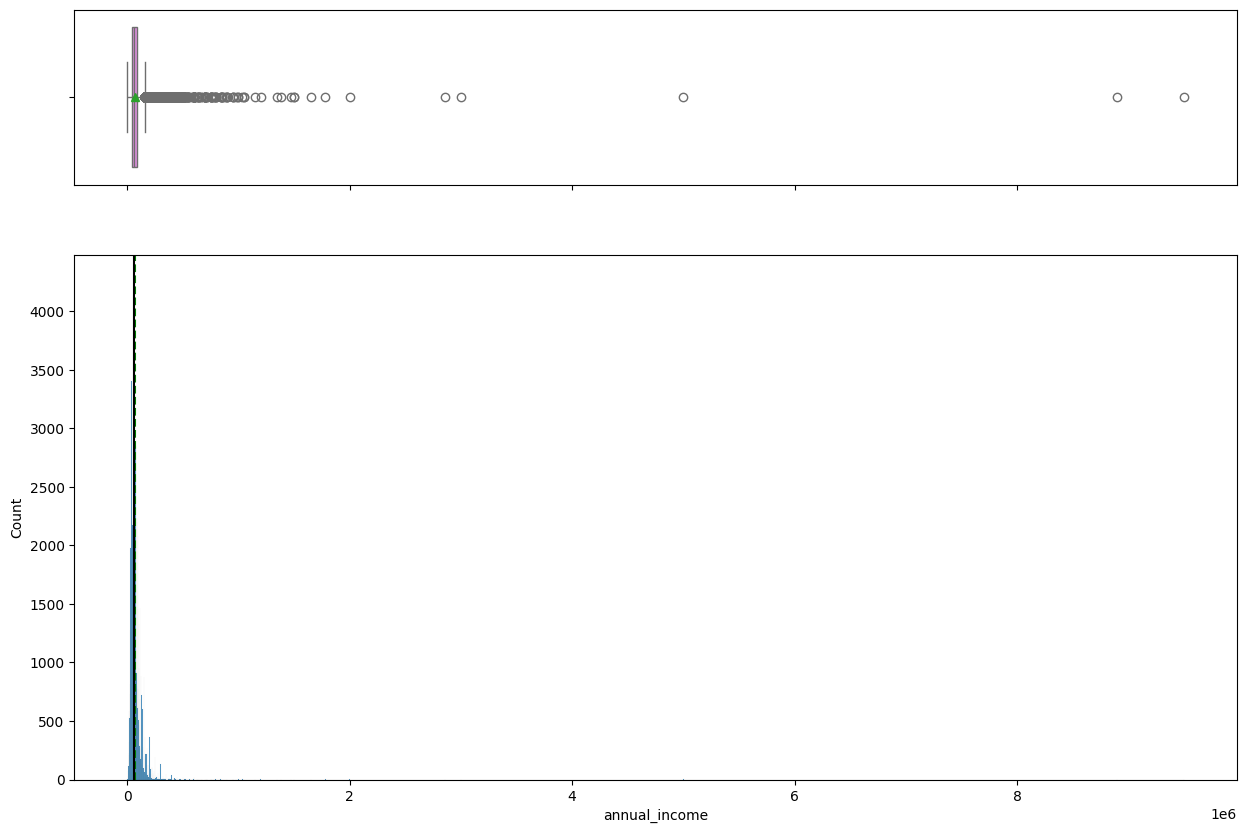

In [ ]:
histogram_boxplot(df, 'annual_income')

annual_income doesn't appear to have a strong correlation with anything else. Further, it is highly right skewed, with a lot of outliers. So, we should use median here.

In [ ]:
#impute values into the three data sets
#imputer_mode = SimpleImputer(strategy="median")
#X_train[['annual_income']] = imputer_mode.fit_transform(X_train[['annual_income']])
#X_val[['annual_income']] = imputer_mode.transform(X_val[['annual_income']])

### delinq_2yrs

In [ ]:
#isolate var
target_var = 'delinq_2yrs'
single_variable_correlations = correlation_matrix[[target_var]]

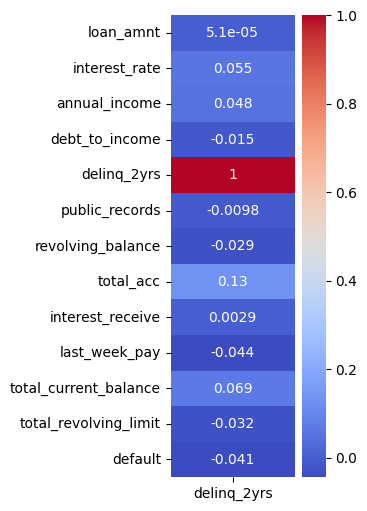

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

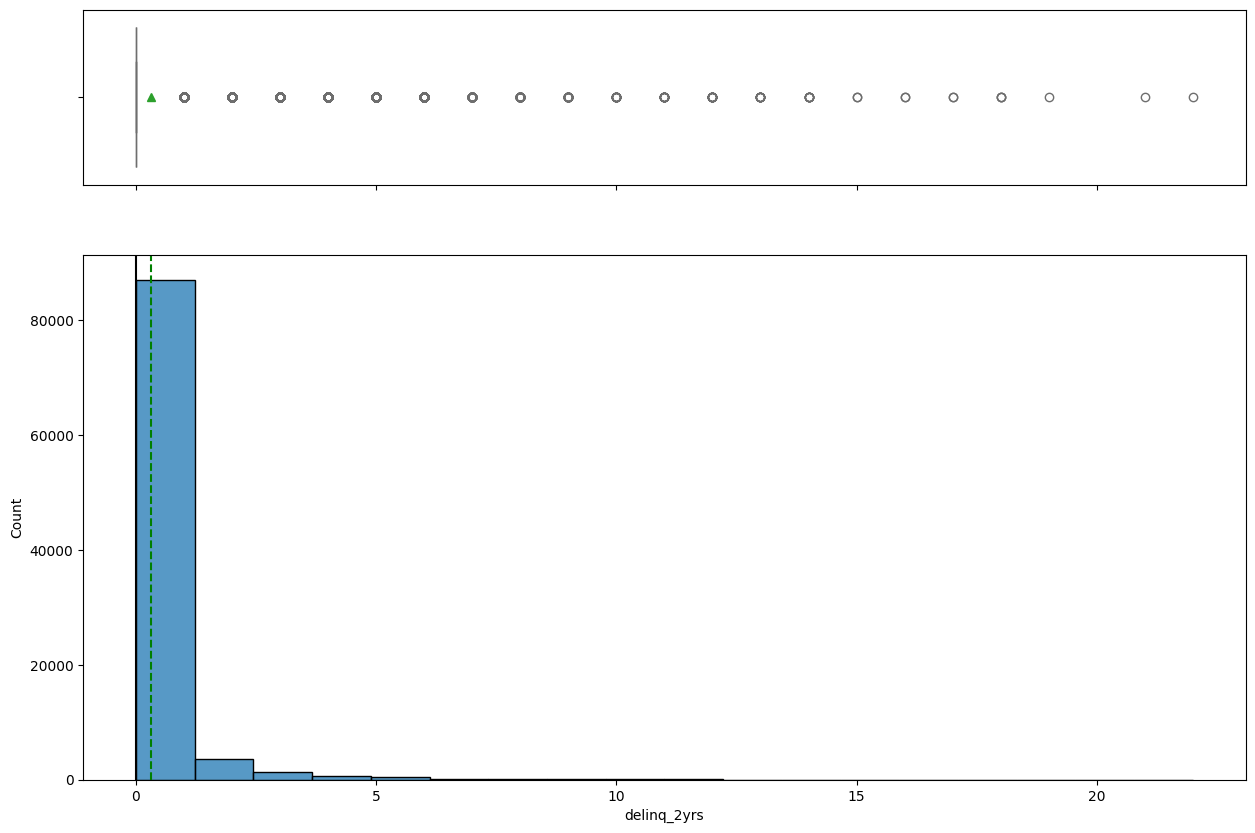

In [ ]:
histogram_boxplot(df, 'delinq_2yrs')

delinq_2yrs isn't correlated with anything and is heavily right skewed, so we should use median here.

In [ ]:
#impute values into the data sets
#X_train[['delinq_2yrs']] = imputer_mode.fit_transform(X_train[['delinq_2yrs']])
#X_val[['delinq_2yrs']] = imputer_mode.transform(X_val[['delinq_2yrs']])

### public_records

In [ ]:
#isolate var
target_var = 'public_records'
single_variable_correlations = correlation_matrix[[target_var]]

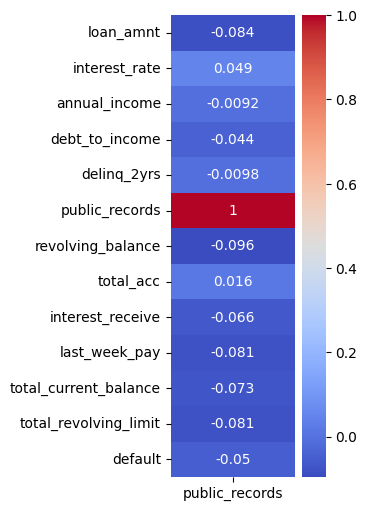

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

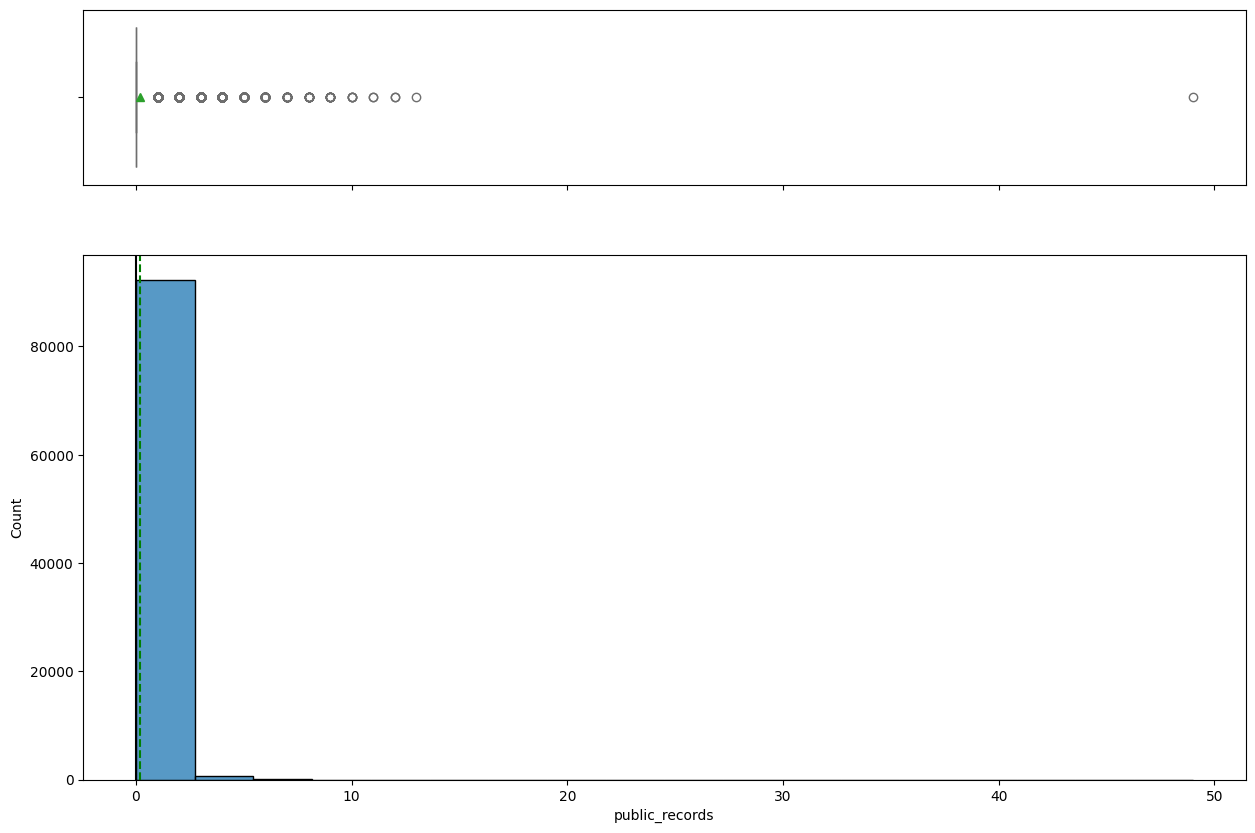

In [ ]:
histogram_boxplot(df, 'public_records')

public_records isn't correlated with anything and is right skewed, so we should use median here.

In [ ]:
#impute values into the data sets
#X_train[['public_records']] = imputer_mode.fit_transform(X_train[['public_records']])
#X_val[['public_records']] = imputer_mode.transform(X_val[['public_records']])

### total_acc

In [ ]:
#isolate var
target_var = 'total_acc'
single_variable_correlations = correlation_matrix[[target_var]]

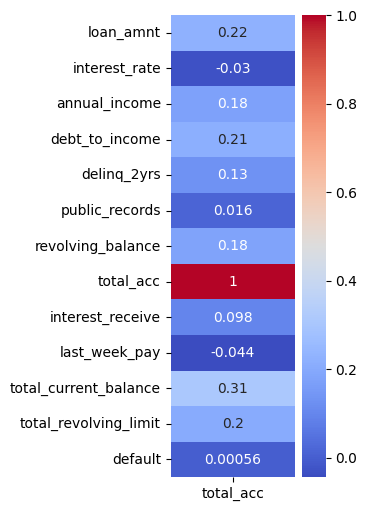

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

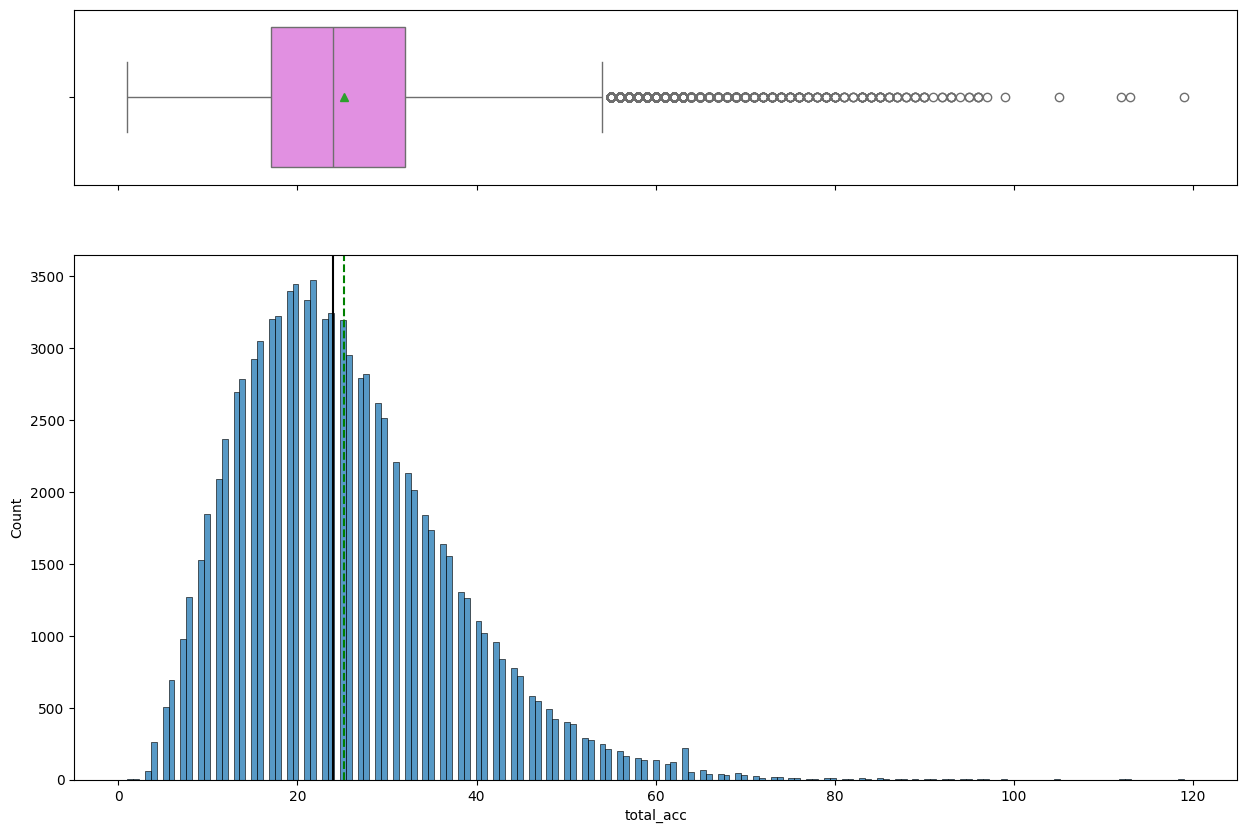

In [ ]:
histogram_boxplot(df, 'total_acc')

total_acc is not correlated with anything and is right skewed, so we should use median.

In [ ]:
#impute values into the data sets
#X_train[['total_acc']] = imputer_mode.fit_transform(X_train[['total_acc']])
#X_val[['total_acc']] = imputer_mode.transform(X_val[['total_acc']])

### total_current_balance

In [ ]:
#isolate var
target_var = 'total_current_balance'
single_variable_correlations = correlation_matrix[[target_var]]

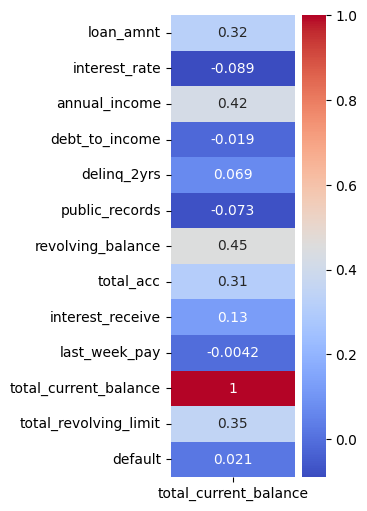

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

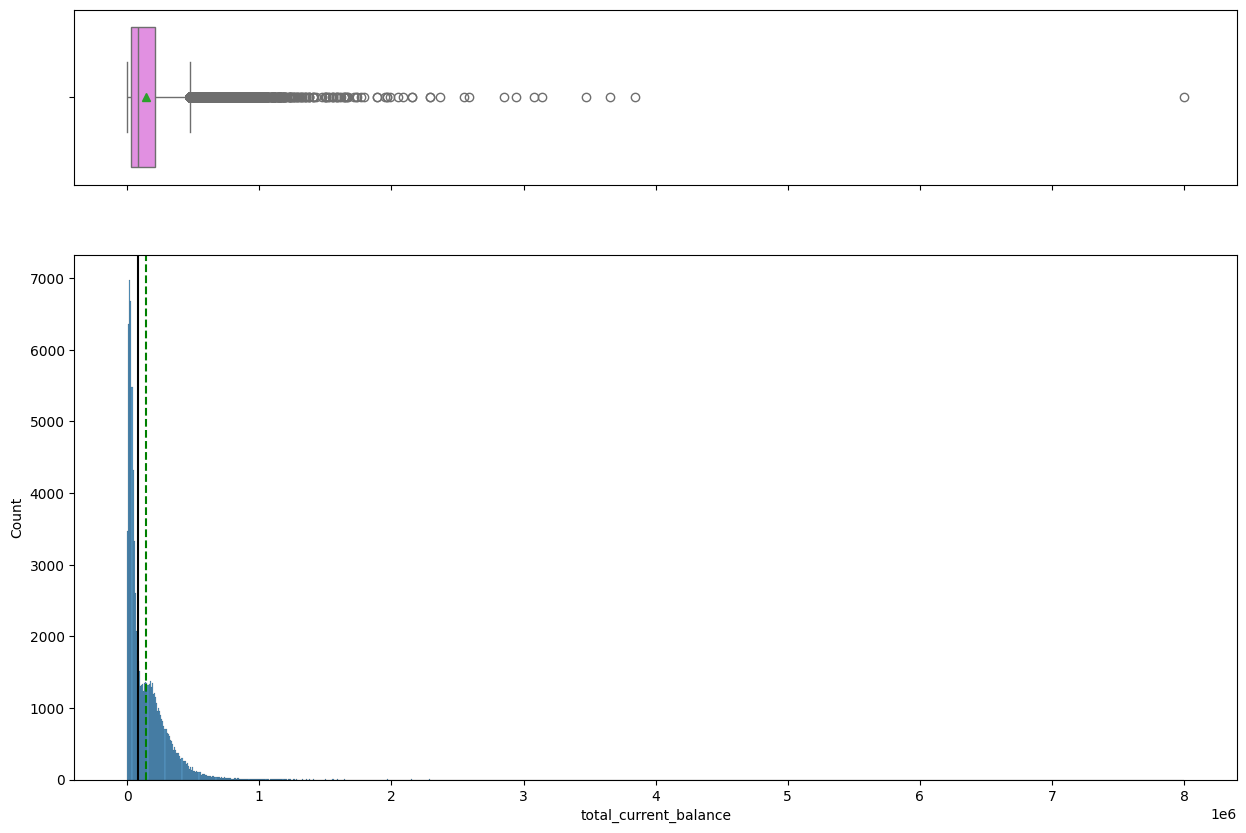

In [ ]:
histogram_boxplot(df, 'total_current_balance')

total_current_balance doesn't have a strong correlation with anything, and is heavily right skewed, so we should use median.

In [ ]:
#impute values into the data sets
#X_train[['total_current_balance']] = imputer_mode.fit_transform(X_train[['total_current_balance']])
#X_val[['total_current_balance']] = imputer_mode.transform(X_val[['total_current_balance']])

### total_revolving_limit

In [ ]:
#isolate var
target_var = 'total_revolving_limit'
single_variable_correlations = correlation_matrix[[target_var]]

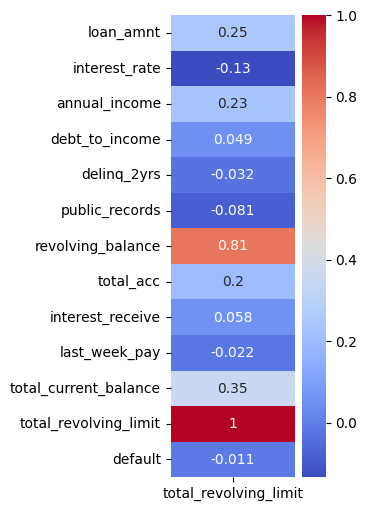

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

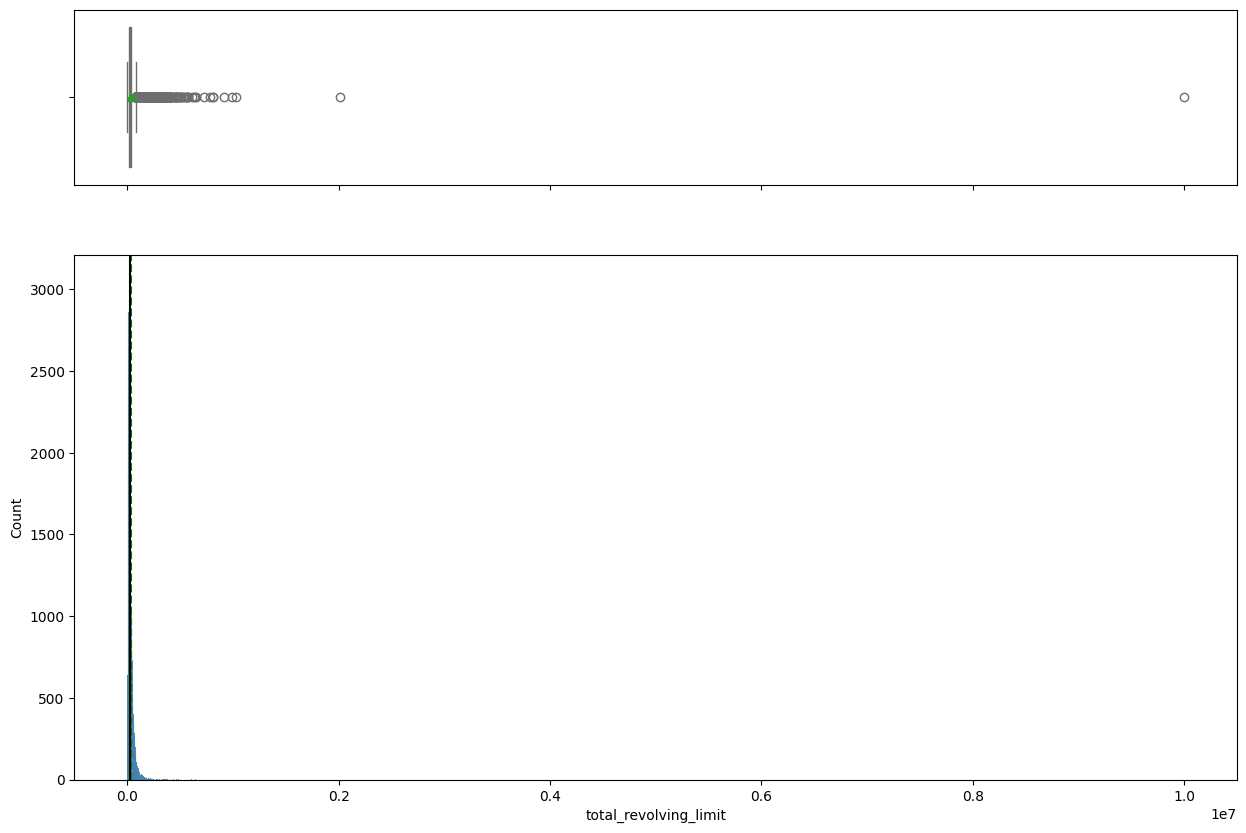

In [ ]:
histogram_boxplot(df, 'total_revolving_limit')

total_revolving_limit has a strong correlation with revolving_balance, and is heavily right skewed, so we should use median.

In [ ]:
#impute values into the data sets
#X_train[['total_revolving_limit']] = imputer_mode.fit_transform(X_train[['total_revolving_limit']])
#X_val[['total_revolving_limit']] = imputer_mode.transform(X_val[['total_revolving_limit']])

### Imputation Until Now

In [ ]:
#columns specifications for each strategy
median_impute_cols = ['annual_income', 'delinq_2yrs', 'public_records', 'total_acc', 'total_current_balance', 'total_revolving_limit']
mode_impute_cols = ['job_experience']

#set up the imputers
median_imputer = SimpleImputer(strategy = 'median')
mode_imputer = SimpleImputer(strategy = 'most_frequent') #mode

#set up column transformer, using passthrough to preserve any cols we didn't mess with
preprocessor = ColumnTransformer(transformers = [
    ('median_imputer', median_imputer, median_impute_cols),
     ('mode_imputer', mode_imputer, mode_impute_cols)
     ], remainder = 'passthrough', verbose_feature_names_out = False) #verbose feature names prevents clunky column naming

#fit the preprocessor on training data
preprocessor.fit(X_train)

#apply imputers on the train and val sets
X_train_imputed_arr = preprocessor.transform(X_train)
X_val_imputed_arr = preprocessor.transform(X_val)

#get column labels so we can turn arrays into dfs
feature_names = preprocessor.get_feature_names_out()

#convert the numpy arrays with the imputed values into dfs
X_train_imputed = pd.DataFrame(X_train_imputed_arr, columns = feature_names, index = X_train.index)
X_val_imputed = pd.DataFrame(X_val_imputed_arr, columns = feature_names, index = X_val.index)


In [ ]:
#impute on test
test_imputed_arr = preprocessor.transform(test)
test_imputed = pd.DataFrame(test_imputed_arr, columns = feature_names, index = test.index)

In [ ]:
#see null tallies
X_train_imputed.isnull().sum()

annual_income                    0
delinq_2yrs                      0
public_records                   0
total_acc                        0
total_current_balance            0
total_revolving_limit            0
job_experience                   0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
home_ownership                   0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
revolving_balance                0
interest_receive                 0
application_type                 0
last_week_pay                 1360
dtype: int64

In [ ]:
#see null tallies
X_val_imputed.isnull().sum()

annual_income                   0
delinq_2yrs                     0
public_records                  0
total_acc                       0
total_current_balance           0
total_revolving_limit           0
job_experience                  0
loan_amnt                       0
loan_term                       0
interest_rate                   0
loan_grade                      0
loan_subgrade                   0
home_ownership                  0
income_verification_status      0
loan_purpose                    0
state_code                      0
debt_to_income                  0
revolving_balance               0
interest_receive                0
application_type                0
last_week_pay                 564
dtype: int64

In [ ]:
#see null tallies
test_imputed.isnull().sum()

annual_income                   0
delinq_2yrs                     0
public_records                  0
total_acc                       0
total_current_balance           0
total_revolving_limit           0
job_experience                  0
loan_amnt                       0
loan_term                       0
interest_rate                   0
loan_grade                      0
loan_subgrade                   0
home_ownership                  0
income_verification_status      0
loan_purpose                    0
state_code                      0
debt_to_income                  0
revolving_balance               0
interest_receive                0
application_type                0
last_week_pay                 806
dtype: int64

In [ ]:
#last_week_pay -- use median with interest_receive
#job_experience -- categorical, use mode

### last_week_pay

In [ ]:
#isolate var
target_var = 'last_week_pay'
single_variable_correlations = correlation_matrix[[target_var]]

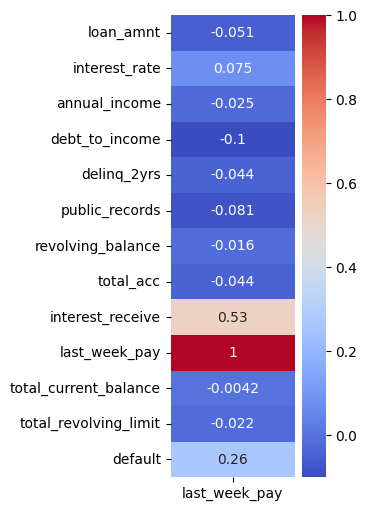

In [ ]:
#do heatmap
plt.figure(figsize = (2, 6))
sns.heatmap(single_variable_correlations, annot=True, cmap = 'coolwarm', fmt = '.2g');

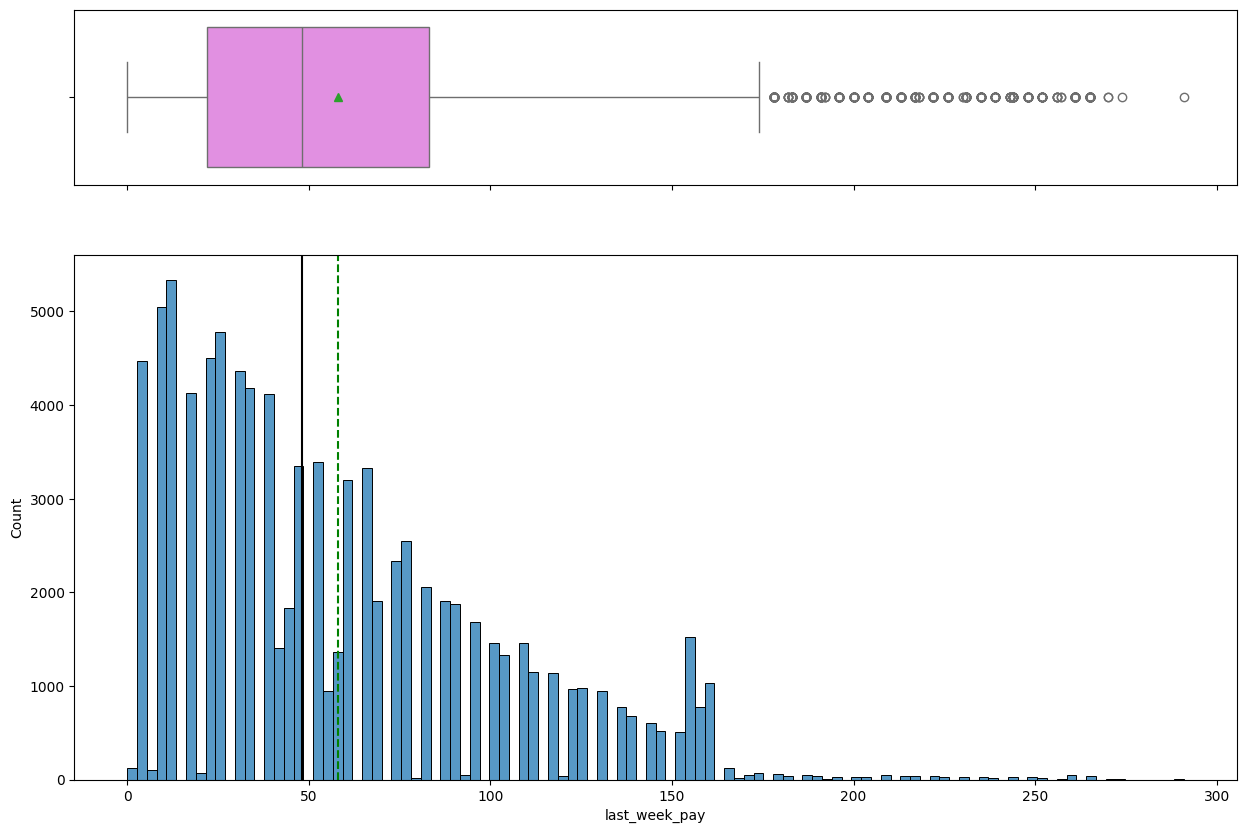

In [ ]:
histogram_boxplot(df, 'last_week_pay')

last_week_pay has some corrleation with interest_receive, and is right skewed. We should use median and account for interest_receive. We'll do that by binning interest_receive.

In [ ]:
#make and save bin edges
_, bin_edges = pd.qcut(X_train['interest_receive'],
                                                             q = 4,
                                                             labels = False,
                                                             retbins = True,
                                                             duplicates = 'drop'
                                                             )

#handling values outside training range
bin_edges[0] = -np.inf
bin_edges[-1] = np.inf

#bin labels
bin_labels = ['Low', 'Medium', 'High', 'Very High']

#create bins column in training set
X_train_imputed['interest_receive_bin'] = pd.cut(X_train_imputed['interest_receive'],
                                                 bins = bin_edges,
                                                 labels = bin_labels)

#save medians per bin
median_map = X_train_imputed.groupby('interest_receive_bin', observed = True)['last_week_pay'].median()

#backup median
backup_median = X_train_imputed['last_week_pay'].median()


In [ ]:

#see how it looks
X_train_imputed

annual_income delinq_2yrs public_records total_acc  \
40883       62000.0         1.0            0.0      19.0   
70146       65000.0         0.0            1.0      16.0   
84472      102000.0         0.0            0.0      24.0   
81649       76000.0         0.0            0.0      18.0   
47161       61000.0         2.0            0.0      44.0   
...             ...         ...            ...       ...   
48179       35000.0         0.0            0.0      44.0   
55783       63000.0         1.0            0.0      37.0   
14682       59500.0         0.0            0.0      15.0   
24743      120000.0         0.0            3.0      31.0   
75916       18000.0         1.0            0.0      18.0   

      total_current_balance total_revolving_limit job_experience loan_amnt  \
40883              168705.0                8300.0       <5 Years     18000   
70146               58054.0                7300.0      10+ years     12000   
84472               28443.0               23600.0       <5 Years     24000   
81649              210143.0               41900.0      10+ years     15000   
47161              196576.0               48400.0      10+ years     10000   
...                     ...                   ...            ...       ...   
48179               36637.0               48700.0     6-10 years     12575   
55783               26403.0               74400.0      10+ years     15000   
14682              202689.0               25900.0      10+ years     27000   
24743               16937.0               11400.0     6-10 years      8000   
75916                8164.0               21400.0       <5 Years      7900   

      loan_term interest_rate  ... home_ownership income_verification_status  \
40883   3 years         10.64  ...       MORTGAGE                   Verified   
70146   5 years         13.33  ...       MORTGAGE               Not Verified   
84472   3 years           7.9  ...           RENT                   Verified   
81649   3 years         14.31  ...       MORTGAGE            Source Verified   
47161   3 years          8.18  ...            OWN            Source Verified   
...         ...           ...  ...            ...                        ...   
48179   5 years         25.57  ...           RENT            Source Verified   
55783   3 years         10.99  ...            OWN            Source Verified   
14682   5 years         17.57  ...       MORTGAGE            Source Verified   
24743   3 years         15.31  ...       MORTGAGE            Source Verified   
75916   3 years         12.88  ...            OWN                   Verified   

             loan_purpose state_code debt_to_income revolving_balance  \
40883  debt_consolidation         TX          20.11              4993   
70146  debt_consolidation         VT          27.53              6539   
84472         credit_card         CA           11.6             14564   
81649         credit_card         DE          32.95             28111   
47161  debt_consolidation         NY           9.33             11382   
...                   ...        ...            ...               ...   
48179  debt_consolidation         TX          30.11             12550   
55783  debt_consolidation         CA          15.95             26089   
14682         credit_card         IL          27.96             16369   
24743  debt_consolidation         NY           6.76              3459   
75916  debt_consolidation         FL           15.2              8164   

      interest_receive application_type last_week_pay interest_receive_bin  
40883          2922.63       INDIVIDUAL         122.0            Very High  
70146           377.39       INDIVIDUAL          13.0                  Low  
84472          2684.27       INDIVIDUAL         113.0            Very High  
81649          1738.33       INDIVIDUAL          52.0                 High  
47161           253.47       INDIVIDUAL          17.0                  Low  
...                ...              ...         

In [ ]:
#look at the bin sizes
X_train_imputed.groupby(['interest_receive_bin'])['last_week_pay'].size()

/tmp/ipython-input-1015895438.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_train_imputed.groupby(['interest_receive_bin'])['last_week_pay'].size()


interest_receive_bin
Low          16306
Medium       16306
High         16304
Very High    16305
Name: last_week_pay, dtype: int64

In [ ]:
#impute on training set with bin medians and backup median on anything that didn't get filled in
impute_values_train = X_train_imputed['interest_receive_bin'].map(median_map)
X_train_imputed['last_week_pay'] = X_train_imputed['last_week_pay'].fillna(impute_values_train).fillna(backup_median)
X_train_imputed

/tmp/ipython-input-2317961928.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_imputed['last_week_pay'] = X_train_imputed['last_week_pay'].fillna(impute_values_train).fillna(backup_median)


annual_income delinq_2yrs public_records total_acc  \
40883       62000.0         1.0            0.0      19.0   
70146       65000.0         0.0            1.0      16.0   
84472      102000.0         0.0            0.0      24.0   
81649       76000.0         0.0            0.0      18.0   
47161       61000.0         2.0            0.0      44.0   
...             ...         ...            ...       ...   
48179       35000.0         0.0            0.0      44.0   
55783       63000.0         1.0            0.0      37.0   
14682       59500.0         0.0            0.0      15.0   
24743      120000.0         0.0            3.0      31.0   
75916       18000.0         1.0            0.0      18.0   

      total_current_balance total_revolving_limit job_experience loan_amnt  \
40883              168705.0                8300.0       <5 Years     18000   
70146               58054.0                7300.0      10+ years     12000   
84472               28443.0               23600.0       <5 Years     24000   
81649              210143.0               41900.0      10+ years     15000   
47161              196576.0               48400.0      10+ years     10000   
...                     ...                   ...            ...       ...   
48179               36637.0               48700.0     6-10 years     12575   
55783               26403.0               74400.0      10+ years     15000   
14682              202689.0               25900.0      10+ years     27000   
24743               16937.0               11400.0     6-10 years      8000   
75916                8164.0               21400.0       <5 Years      7900   

      loan_term interest_rate  ... home_ownership income_verification_status  \
40883   3 years         10.64  ...       MORTGAGE                   Verified   
70146   5 years         13.33  ...       MORTGAGE               Not Verified   
84472   3 years           7.9  ...           RENT                   Verified   
81649   3 years         14.31  ...       MORTGAGE            Source Verified   
47161   3 years          8.18  ...            OWN            Source Verified   
...         ...           ...  ...            ...                        ...   
48179   5 years         25.57  ...           RENT            Source Verified   
55783   3 years         10.99  ...            OWN            Source Verified   
14682   5 years         17.57  ...       MORTGAGE            Source Verified   
24743   3 years         15.31  ...       MORTGAGE            Source Verified   
75916   3 years         12.88  ...            OWN                   Verified   

             loan_purpose state_code debt_to_income revolving_balance  \
40883  debt_consolidation         TX          20.11              4993   
70146  debt_consolidation         VT          27.53              6539   
84472         credit_card         CA           11.6             14564   
81649         credit_card         DE          32.95             28111   
47161  debt_consolidation         NY           9.33             11382   
...                   ...        ...            ...               ...   
48179  debt_consolidation         TX          30.11             12550   
55783  debt_consolidation         CA          15.95             26089   
14682         credit_card         IL          27.96             16369   
24743  debt_consolidation         NY           6.76              3459   
75916  debt_consolidation         FL           15.2              8164   

      interest_receive application_type last_week_pay interest_receive_bin  
40883          2922.63       INDIVIDUAL         122.0            Very High  
70146           377.39       INDIVIDUAL          13.0                  Low  
84472          2684.27       INDIVIDUAL         113.0            Very High  
81649          1738.33       INDIVIDUAL          52.0                 High  
47161           253.47       INDIVIDUAL          17.0                  Low  
...                ...              ...         

In [ ]:
#make bins in validation
X_val_imputed['interest_receive_bin'] = pd.cut(X_val_imputed['interest_receive'],
                                               bins = bin_edges,
                                               labels = bin_labels)

#impute in validation
impute_values_val = X_val_imputed['interest_receive_bin'].map(median_map)
X_val_imputed['last_week_pay'] = X_val_imputed['last_week_pay'].fillna(impute_values_val).fillna(backup_median)




/tmp/ipython-input-3039371479.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val_imputed['last_week_pay'] = X_val_imputed['last_week_pay'].fillna(impute_values_val).fillna(backup_median)


In [ ]:
#make bins in test
test_imputed['interest_receive_bin'] = pd.cut(test_imputed['interest_receive'],
                                               bins = bin_edges,
                                               labels = bin_labels)

#impute in test
impute_values_test = test_imputed['interest_receive_bin'].map(median_map)
test_imputed['last_week_pay'] = test_imputed['last_week_pay'].fillna(impute_values_test).fillna(backup_median)




/tmp/ipython-input-1054843665.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_imputed['last_week_pay'] = test_imputed['last_week_pay'].fillna(impute_values_test).fillna(backup_median)


In [ ]:
#drop bin columns
X_train_imputed = X_train_imputed.drop(columns = ['interest_receive_bin'])
X_val_imputed = X_val_imputed.drop(columns = ['interest_receive_bin'])


In [ ]:
#drop bin columns
test_imputed = test_imputed.drop(columns = ['interest_receive_bin'])


In [ ]:
#see null tallies
X_train_imputed.isnull().sum()

annual_income                 0
delinq_2yrs                   0
public_records                0
total_acc                     0
total_current_balance         0
total_revolving_limit         0
job_experience                0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
home_ownership                0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
revolving_balance             0
interest_receive              0
application_type              0
last_week_pay                 0
dtype: int64

In [ ]:
#see null tallies
X_val_imputed.isnull().sum()

annual_income                 0
delinq_2yrs                   0
public_records                0
total_acc                     0
total_current_balance         0
total_revolving_limit         0
job_experience                0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
home_ownership                0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
revolving_balance             0
interest_receive              0
application_type              0
last_week_pay                 0
dtype: int64

In [ ]:
#see null tallies
test_imputed.isnull().sum()

annual_income                 0
delinq_2yrs                   0
public_records                0
total_acc                     0
total_current_balance         0
total_revolving_limit         0
job_experience                0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
home_ownership                0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
revolving_balance             0
interest_receive              0
application_type              0
last_week_pay                 0
dtype: int64

## Encode Cat Vars

In [ ]:
#convert numeric vars back to numeric so encoding isn't a mess
#remove "default" fromthe numeric_features list we made earlier during eda
#so we can use it here to single out the numeric vars
numeric_features.remove('default')

In [ ]:
# Convert the numeric columns back to a numeric type
X_train_imputed[numeric_features] = X_train_imputed[numeric_features].astype(float)
X_val_imputed[numeric_features] = X_val_imputed[numeric_features].astype(float)

In [ ]:
#inspect data types
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65221 entries, 40883 to 75916
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   annual_income               65221 non-null  float64
 1   delinq_2yrs                 65221 non-null  float64
 2   public_records              65221 non-null  float64
 3   total_acc                   65221 non-null  float64
 4   total_current_balance       65221 non-null  float64
 5   total_revolving_limit       65221 non-null  float64
 6   job_experience              65221 non-null  object 
 7   loan_amnt                   65221 non-null  float64
 8   loan_term                   65221 non-null  object 
 9   interest_rate               65221 non-null  float64
 10  loan_grade                  65221 non-null  object 
 11  loan_subgrade               65221 non-null  object 
 12  home_ownership              65221 non-null  object 
 13  income_verification_status  6522

In [ ]:
#inspect data types
X_val_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27953 entries, 10575 to 60963
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   annual_income               27953 non-null  float64
 1   delinq_2yrs                 27953 non-null  float64
 2   public_records              27953 non-null  float64
 3   total_acc                   27953 non-null  float64
 4   total_current_balance       27953 non-null  float64
 5   total_revolving_limit       27953 non-null  float64
 6   job_experience              27953 non-null  object 
 7   loan_amnt                   27953 non-null  float64
 8   loan_term                   27953 non-null  object 
 9   interest_rate               27953 non-null  float64
 10  loan_grade                  27953 non-null  object 
 11  loan_subgrade               27953 non-null  object 
 12  home_ownership              27953 non-null  object 
 13  income_verification_status  2795

In [ ]:
#set up onehot encoder preprocessor

cat_features2 = X_train_imputed.select_dtypes(include = ['object', 'category']).columns.tolist()

encoder_preprocessor = ColumnTransformer(
    transformers = [
        ('onehot_encode',
         OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output = False),
         cat_features2)
        ],
    remainder = 'passthrough')

encoder_preprocessor.fit(X_train_imputed)

#apply onehot encoder on train and val sets
X_train_final_arr = encoder_preprocessor.transform(X_train_imputed)
X_val_final_arr = encoder_preprocessor.transform(X_val_imputed)

#get column labels so we can turn arrays into dfs
feature_names_final = encoder_preprocessor.get_feature_names_out()

#convert the numpy arrays with the imputed values into dfs
X_train_final = pd.DataFrame(X_train_final_arr, columns = feature_names_final, index = X_train_imputed.index)
X_val_final = pd.DataFrame(X_val_final_arr, columns = feature_names_final, index = X_val_imputed.index)

In [ ]:
#see how it looks
print(X_train_final.shape, X_val_final.shape)

(65221, 114) (27953, 114)


In [ ]:
#apply onehot encoder on test
test_final_arr = encoder_preprocessor.transform(test_imputed)

#get column labels so we can turn arrays into dfs
feature_names_final = encoder_preprocessor.get_feature_names_out()

#convert the numpy arrays with the imputed values into dfs
test_final = pd.DataFrame(test_final_arr, columns = feature_names_final, index = test_imputed.index)

## Get rid of spec char in column names

In [ ]:
#get rid of special characters in column names, which xgboost doesn't like
new_column_names = {col: re.sub(r'[\[\]<]', '_', col) for col in X_train_final.columns}

# Rename the columns in the DataFrames using the same mapping
X_train_final.rename(columns=new_column_names, inplace=True)
X_val_final.rename(columns=new_column_names, inplace=True)
test_final.rename(columns=new_column_names, inplace=True)

## Make numerical columns numeric

In [ ]:
for col in X_train_final.columns:
    X_train_final[col] = pd.to_numeric(X_train_final[col])
    X_val_final[col] = pd.to_numeric(X_val_final[col])
    test_final[col] = pd.to_numeric(test_final[col])

# Model Building



## Model Evaluation Criteria

We're doing classification, and we're trying to predict which customers will default, resulting in loss for the bank.

1 is default, 0 is non-default -- so default has been selected as the positive class, and 0 has been selected as the negative class.

The model can make wrong predictions by:
* Predicting a customer will default when they won't (false positive)
* Preidcting a customer will not default, when they will (false negative)

The requirements of the hackathon specify accuracy as the evaluation metric -- so we'll use that.

## Model Evaluation Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#sklearn confusino matrix function
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#pulling in function to plot the loss/recall for neural networks
def plot(history, name):
    """
    Function to plot loss/recall

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Recall
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train recall or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation recall or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
#Defining dataframe columns
columns = ["model",
           "# hidden layers",
           "# neurons - hidden layer",
           "activation function - hidden layer ",
           "# epochs","batch size",
           "optimizer",
           "learning rate, momentum",
           "weight initializer",
           "regularization",
           "validation loss",
           "validation accuracy",
           "test accuracy"
           ]


#Creating a pandas dataframe
results = pd.DataFrame(columns=columns)

## Model 1 -- Decision Tree


In [ ]:
#decision tree classifier vanilla
model1 = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
model1.fit(X_train_final, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [ ]:
#check the metrics
model_performance_classification_sklearn(model1, X_train_final, y_train)

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

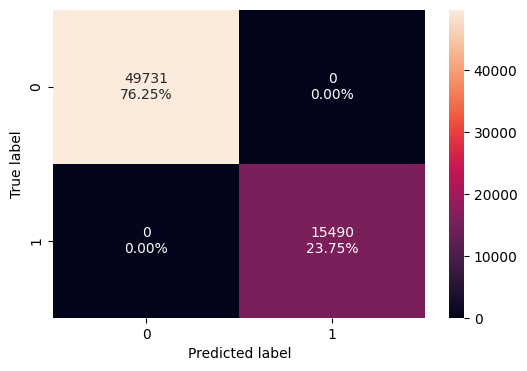

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model1, X_train_final, y_train)

In [ ]:
#check the metrics
model_performance_classification_sklearn(model1, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.794441  0.581563   0.565383  0.573359

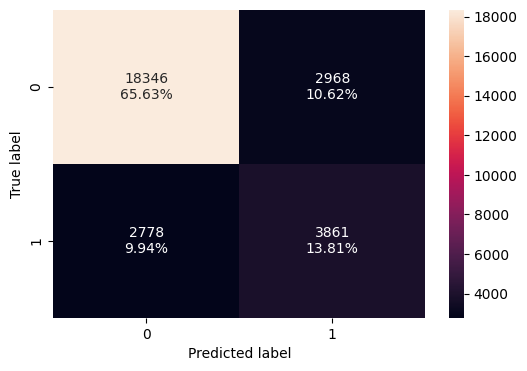

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model1, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model1.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[1] = [
  "Decision Tree", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1  Decision Tree               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -

## Model 2 -- Decision Tree with Pre-pruning

In [ ]:
#use gridsearchcv to find the right mix of tree depth and min leaf samples
#depth on default is 14 so we'll try numbers below that
param_grid_pre = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

#model
model2 = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')

#use gridsearchcv -- similar implementation to AI quiz with mentor
#use recall scoring since we want recall to be the best
grid_search_pre1 = GridSearchCV(model2,
                                param_grid_pre,
                                scoring = 'accuracy',
                                cv = 5,
                                n_jobs = -1)
grid_search_pre1.fit(X_train_final, y_train)

#best params
best_params_pre1 = grid_search_pre1.best_params_

#best recall score
best_recall_pre1 = grid_search_pre1.best_score_

In [ ]:
#show the outcome
print("Best parameters: ", best_params_pre1)
print("Best recall: ", best_recall_pre1)

Best parameters:  {'max_depth': 1, 'min_samples_leaf': 2}
Best recall:  0.7925667431715916


In [ ]:
#make the pre-pruned tree based on the gridsearchcv results
model2 = grid_search_pre1.best_estimator_

In [ ]:
#check the metrics
model_performance_classification_sklearn(model2, X_train_final, y_train)

Accuracy    Recall  Precision        F1
0  0.792567  0.160168   0.826724  0.268347

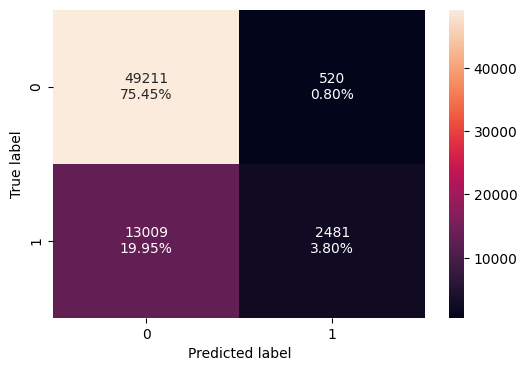

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model2, X_train_final, y_train)

In [ ]:
#check the metrics
model_performance_classification_sklearn(model2, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.792151  0.160114   0.819584  0.267893

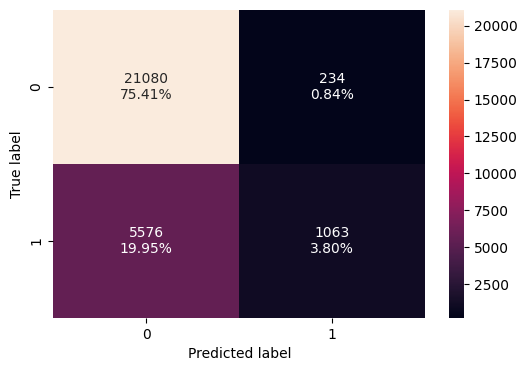

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model2, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model2.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[2] = [
  "Decision Tree w/pre-prune", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -

## Model 3 -- Bagging


In [ ]:
#training
model3 = BaggingClassifier(random_state = 1)
model3.fit(X_train_final, y_train)

BaggingClassifier(random_state=1)

In [ ]:
#check metrics
model_performance_classification_sklearn(model3, X_train_final, y_train)

Accuracy    Recall  Precision        F1
0  0.985695  0.943447   0.996115  0.969066

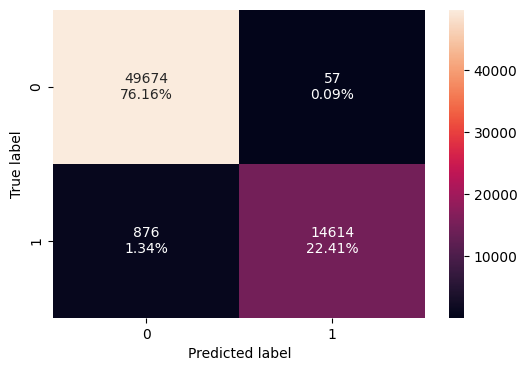

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model3, X_train_final, y_train)

In [ ]:
#check the metrics
model_performance_classification_sklearn(model3, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.844704  0.470101   0.791329  0.589814

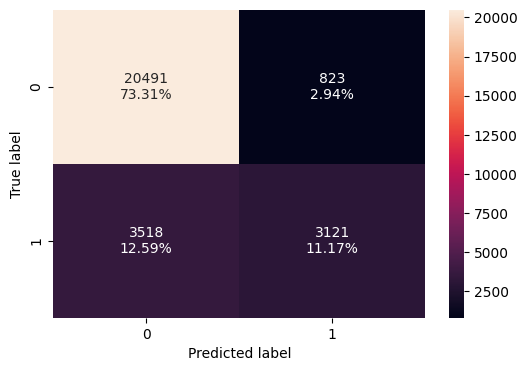

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model3, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model3.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[3] = [
  "Bagging", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   
3                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -

## Model 4 -- ADA Boost


In [ ]:
#training
model4 = AdaBoostClassifier(random_state = 1)
model4.fit(X_train_final, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#check metrics
model_performance_classification_sklearn(model4, X_train_final, y_train)

Accuracy    Recall  Precision        F1
0  0.792567  0.160168   0.826724  0.268347

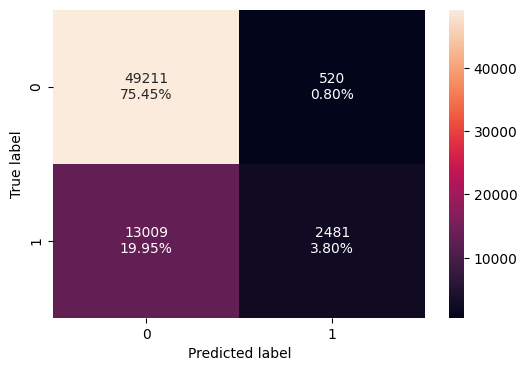

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model4, X_train_final, y_train)

In [ ]:
#check metrics
model_performance_classification_sklearn(model4, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.792151  0.160114   0.819584  0.267893

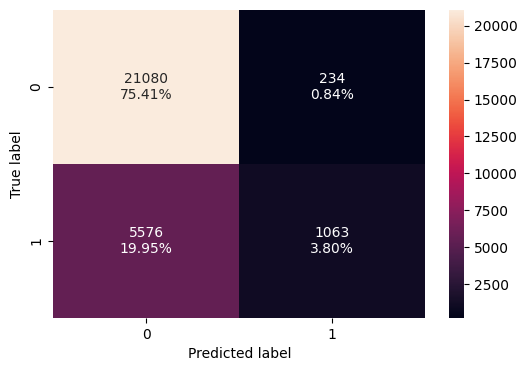

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model4, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model4.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[4] = [
  "ADA Boost", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   
4                  ADA Boost               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   
3                                   -        -          -         -   
4                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   
4                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -  
4             0.792151             -

## Model 5 -- Gradient Boost


In [ ]:
#training
model5 = GradientBoostingClassifier(random_state = 1)
model5.fit(X_train_final, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#check metrics
model_performance_classification_sklearn(model5, X_train_final, y_train)

Accuracy   Recall  Precision        F1
0  0.824642  0.30368   0.878431  0.451331

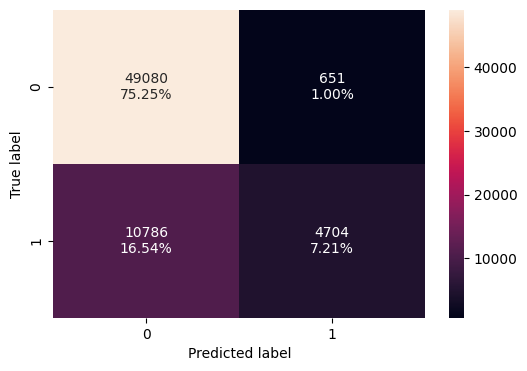

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model5, X_train_final, y_train)

In [ ]:
#check metrics
model_performance_classification_sklearn(model5, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.819805  0.287995   0.860486  0.431554

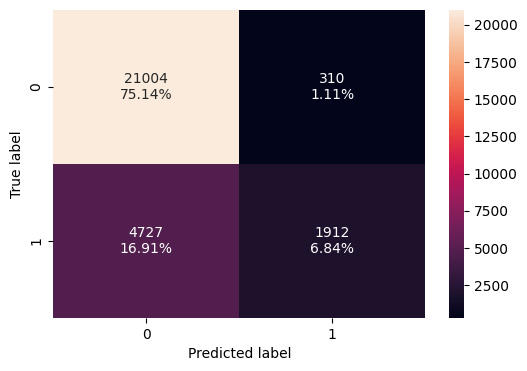

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model5, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model5.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[5] = [
  "Gradient Boost", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   
4                  ADA Boost               -                        -   
5             Gradient Boost               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   
3                                   -        -          -         -   
4                                   -        -          -         -   
5                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   
4                       -                  -              -               -   
5                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -  
4             0.792151             -  
5             0.819805             -

## Model 6 -- Random Forest

In [ ]:
#training
model6 = RandomForestClassifier(random_state = 1, class_weight = 'balanced')
model6.fit(X_train_final, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [ ]:
#check metrics
model_performance_classification_sklearn(model6, X_train_final, y_train)

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

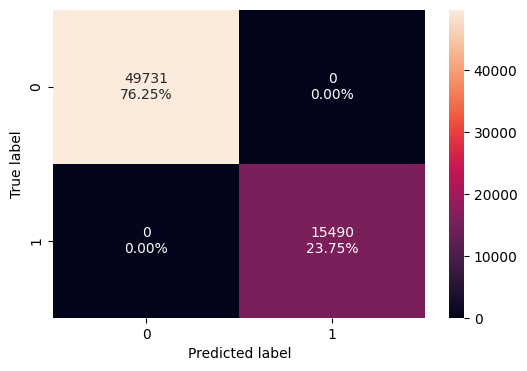

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model6, X_train_final, y_train)

In [ ]:
#check metrics
model_performance_classification_sklearn(model6, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.820771  0.290556    0.86541  0.435047

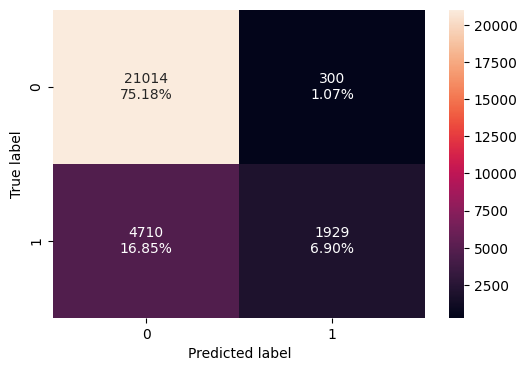

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model6, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model6.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[6] = [
  "Random Forest", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   
4                  ADA Boost               -                        -   
5             Gradient Boost               -                        -   
6              Random Forest               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   
3                                   -        -          -         -   
4                                   -        -          -         -   
5                                   -        -          -         -   
6                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   
4                       -                  -              -               -   
5                       -                  -              -               -   
6                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -  
4             0.792151             -  
5             0.819805             -  
6             0.820771             -

## Model 7 -- XGBoost

In [ ]:
#training
model7 = XGBClassifier(random_state = 1, eval_metric = "logloss")
model7.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
#check metrics
model_performance_classification_sklearn(model7, X_train_final, y_train)

Accuracy    Recall  Precision        F1
0  0.901826  0.675468   0.883774  0.765707

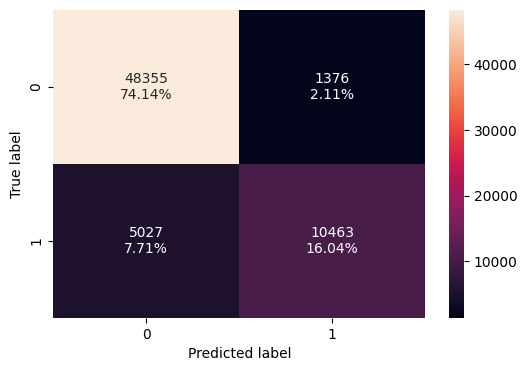

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model7, X_train_final, y_train)

In [ ]:
#check metrics
model_performance_classification_sklearn(model7, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.869889  0.581112   0.818413  0.679644

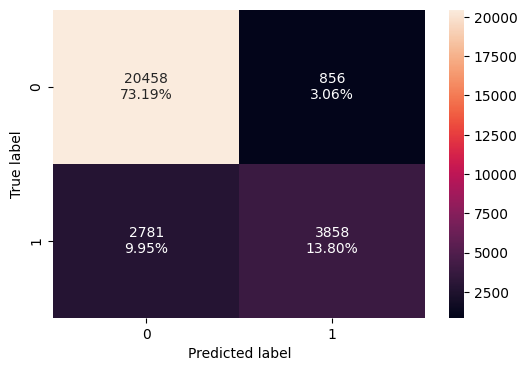

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model7, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model7.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[7] = [
  "XGBoost", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   
4                  ADA Boost               -                        -   
5             Gradient Boost               -                        -   
6              Random Forest               -                        -   
7                    XGBoost               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   
3                                   -        -          -         -   
4                                   -        -          -         -   
5                                   -        -          -         -   
6                                   -        -          -         -   
7                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   
4                       -                  -              -               -   
5                       -                  -              -               -   
6                       -                  -              -               -   
7                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -  
4             0.792151             -  
5             0.819805             -  
6             0.820771             -  
7             0.869889             -

## Model 8 -- Logistic Regression


In [ ]:
#set up pipeline with scaler and logistic regression and fit it
#we're naming the pipeline 'model8' because it's basically acting as model 8
model8 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 1))])
model8.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=1))])

In [ ]:
#check metrics
model_performance_classification_sklearn(model8, X_train_final, y_train)

Accuracy    Recall  Precision        F1
0  0.777081  0.256682   0.567919  0.353564

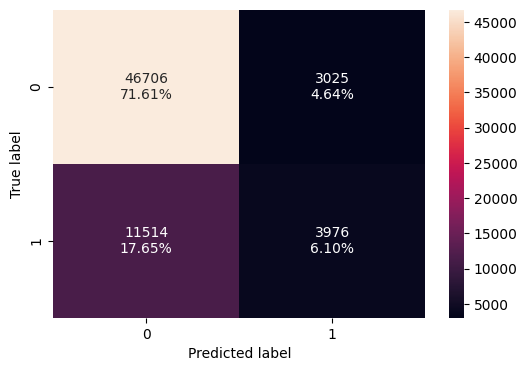

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model8, X_train_final, y_train)

In [ ]:
#check metrics
model_performance_classification_sklearn(model8, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.775015  0.254406   0.557794  0.349436

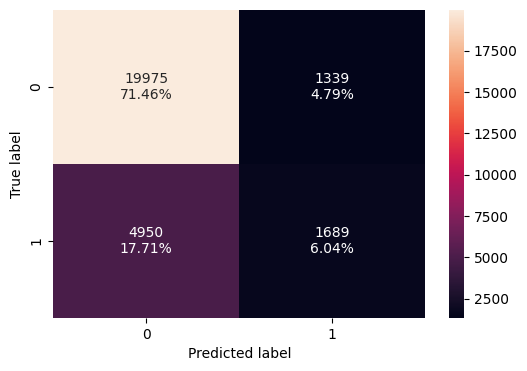

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model8, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model8.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[8] = [
  "Logistic Reg", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   
4                  ADA Boost               -                        -   
5             Gradient Boost               -                        -   
6              Random Forest               -                        -   
7                    XGBoost               -                        -   
8               Logistic Reg               -                        -   

  activation function - hidden layer  # epochs batch size optimizer  \
1                                   -        -          -         -   
2                                   -        -          -         -   
3                                   -        -          -         -   
4                                   -        -          -         -   
5                                   -        -          -         -   
6                                   -        -          -         -   
7                                   -        -          -         -   
8                                   -        -          -         -   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   
4                       -                  -              -               -   
5                       -                  -              -               -   
6                       -                  -              -               -   
7                       -                  -              -               -   
8                       -                  -              -               -   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -  
4             0.792151             -  
5             0.819805             -  
6             0.820771             -  
7             0.869889             -  
8             0.775015             -

## Model 9 -- Basic Neural Network


In [ ]:
#clear keras session
tf.keras.backend.clear_session()

In [ ]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model9 = Sequential()

#hidden layer
model9.add(Dense(64, activation = 'relu', input_shape = (X_train_final.shape[1],)))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model9.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#looking at model details
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,425 (29.00 KB)

 Trainable params: 7,425 (29.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#defining optimizer
optimizer = keras.optimizers.Adam()

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with accuracy as metric
model9.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model9.fit(X_train_final, y_train, validation_data = (X_val_final, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end = time.time()

Epoch 1/50
653/653 - 7s - 10ms/step - accuracy: 0.6579 - loss: 236.4140 - val_accuracy: 0.5253 - val_loss: 61.9924
Epoch 2/50
653/653 - 7s - 10ms/step - accuracy: 0.6716 - loss: 71.8848 - val_accuracy: 0.6418 - val_loss: 40.8698
Epoch 3/50
653/653 - 4s - 6ms/step - accuracy: 0.6769 - loss: 67.4690 - val_accuracy: 0.7616 - val_loss: 106.8769
Epoch 4/50
653/653 - 4s - 6ms/step - accuracy: 0.6784 - loss: 62.4124 - val_accuracy: 0.7537 - val_loss: 59.7633
Epoch 5/50
653/653 - 3s - 4ms/step - accuracy: 0.6818 - loss: 53.0859 - val_accuracy: 0.7533 - val_loss: 113.7966
Epoch 6/50
653/653 - 6s - 10ms/step - accuracy: 0.6790 - loss: 67.7135 - val_accuracy: 0.7626 - val_loss: 146.5398
Epoch 7/50
653/653 - 4s - 6ms/step - accuracy: 0.6824 - loss: 58.2227 - val_accuracy: 0.5260 - val_loss: 35.7685
Epoch 8/50
653/653 - 3s - 4ms/step - accuracy: 0.6838 - loss: 55.1897 - val_accuracy: 0.7791 - val_loss: 52.2356
Epoch 9/50
653/653 - 3s - 4ms/step - accuracy: 0.6853 - loss: 51.4057 - val_accuracy: 0.7

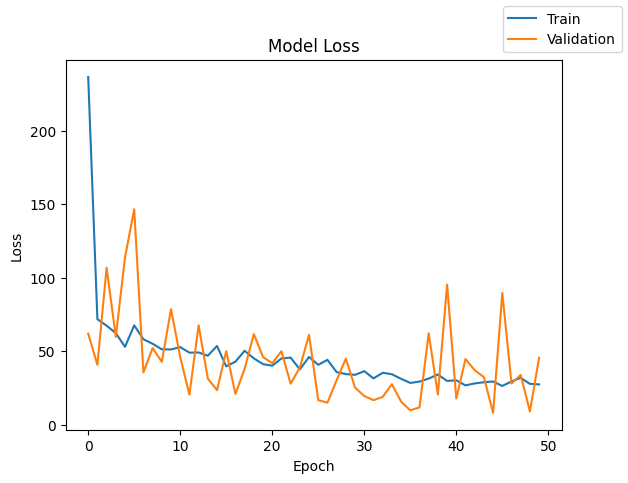

In [ ]:
#plot model's loss
plot(history, 'loss')

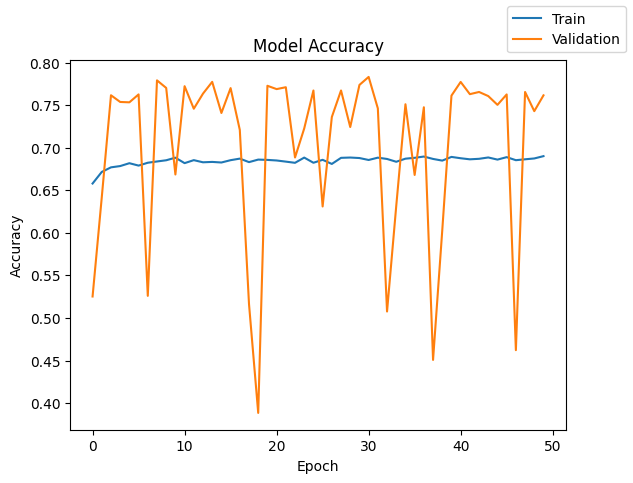

In [ ]:
#plot model's accuracy
plot(history,'accuracy')

In [ ]:
#generate accuracy score again
predictions_prob = model9.predict(X_val_final)


874/874 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
#round predictions to either 0 or 1
pred = (predictions_prob > 0.5).astype(int)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[9] = [
  "Neural Network", #model name
  "1", #hidden layers
  "64", #neurons/layer
  "relu", #activation function
  epochs, #epochs
  batch_size, #batch size
  optimizer, #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  history.history["val_loss"][-1], #val loss
  history.history["val_accuracy"][-1], #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1              Decision Tree               -                        -   
2  Decision Tree w/pre-prune               -                        -   
3                    Bagging               -                        -   
4                  ADA Boost               -                        -   
5             Gradient Boost               -                        -   
6              Random Forest               -                        -   
7                    XGBoost               -                        -   
8               Logistic Reg               -                        -   
9             Neural Network               1                       64   

  activation function - hidden layer  # epochs batch size  \
1                                   -        -          -   
2                                   -        -          -   
3                                   -        -          -   
4                                   -        -          -   
5                                   -        -          -   
6                                   -        -          -   
7                                   -        -          -   
8                                   -        -          -   
9                                relu       50        100   

                                                   optimizer  \
1                                                          -   
2                                                          -   
3                                                          -   
4                                                          -   
5                                                          -   
6                                                          -   
7                                                          -   
8                                                          -   
9  <keras.src.optimizers.adam.Adam object at 0x7feeead81880>   

  learning rate, momentum weight initializer regularization validation loss  \
1                       -                  -              -               -   
2                       -                  -              -               -   
3                       -                  -              -               -   
4                       -                  -              -               -   
5                       -                  -              -               -   
6                       -                  -              -               -   
7                       -                  -              -               -   
8                       -                  -              -               -   
9                       -                  -              -       45.708855   

   validation accuracy test accuracy  
1             0.794441             -  
2             0.792151             -  
3             0.844704             -  
4             0.792151             -  
5             0.819805             -  
6             0.820771             -  
7             0.869889             -  
8             0.775015             -  
9             0.761492             -

Let's try to fine-tune Bagging, XGBoost, and Neural Networks.

## Model 10 -- Bagging with Fine-tuning


This was problematic

In [ ]:
#defining scorer and kfolds
scorer = metrics.make_scorer(metrics.accuracy_score)
kfold = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [ ]:
#set up classifiers
clf = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
bag = BaggingClassifier(estimator = clf, random_state = 1, n_jobs = -1)

#parameter grid for random search
param_grid = {
    'n_estimators': [25, 50, 75],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0],
    #tree tuning
    'estimator__max_depth': [5, 7, 10]
              }
#call randomized search
randomized_cv = RandomizedSearchCV(
    estimator = bag,
    param_distributions = param_grid,
    n_jobs = -1,
    n_iter = 10,
    scoring = scorer,
    cv = 5,
    random_state = 1,
    verbose = 10)

#fit parameters in randomized search
randomized_cv.fit(X_train_final, y_train)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
#put the best model in model 10
model10 = randomized_cv.best_estimator_

In [ ]:
#check metrics
model_performance_classification_sklearn(model10, X_train_final, y_train)

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model10, X_train_final, y_train)

In [ ]:
#check the metrics
model_performance_classification_sklearn(model10, X_val_final, y_val)

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model10, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model10.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[10] = [
  "Bagging Fine-tuned", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

## Model 11 -- XGBoost with Fine-tuning

In [ ]:
#defining scorer and kfolds
scorer = metrics.make_scorer(metrics.accuracy_score)
kfold = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [ ]:
#define the model
xgb = XGBClassifier(tree_method='hist', #tell it to use the gpu
                    device='cuda',
                    random_state = 1,
                    eval_metric = 'logloss')

#parameter grid for random search
param_grid = {
    'n_estimators': np.arange(75, 300, 25),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 3, 5, 8],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': np.arange(5, 15, 1)
              }

#call randomized search
randomized_cv = RandomizedSearchCV(estimator = xgb,
                                   param_distributions = param_grid,
                                   n_jobs = -1,
                                   n_iter = 50,
                                   scoring = scorer,
                                   cv = 5,
                                   random_state = 1,
                                   verbose = 10)

#fit parameters in randomized search
randomized_cv.fit(X_train_final, y_train)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'subsample': 1.0, 'n_estimators': np.int64(250), 'max_depth': np.int64(7), 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0} with CV score=0.8735376340408247:


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are:
* 'subsample': 1.0,
* 'n_estimators': np.int64(250),
* 'max_depth': np.int64(7),
* 'learning_rate': 0.3,
* 'gamma': 0,
* 'colsample_bytree': 1.0

with CV score=0.8735376340408247:

In [ ]:
#put the best model in model 11
model11 = randomized_cv.best_estimator_

In [ ]:
#check metrics
model_performance_classification_sklearn(model11, X_train_final, y_train)

Accuracy    Recall  Precision        F1
0  0.965655  0.890962   0.961608  0.924938

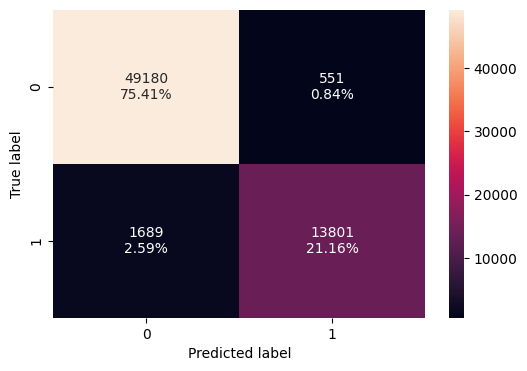

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model11, X_train_final, y_train)

In [ ]:
#check metrics
model_performance_classification_sklearn(model11, X_val_final, y_val)

Accuracy    Recall  Precision        F1
0  0.871785  0.610032   0.802775  0.693256

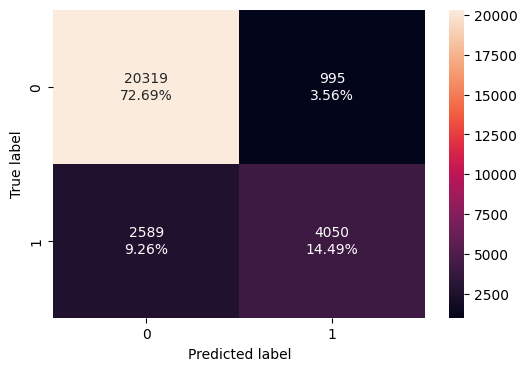

In [ ]:
#confusion matrix
confusion_matrix_sklearn(model11, X_val_final, y_val)

In [ ]:
#generate accuracy score again
pred = model11.predict(X_val_final)

#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[11] = [
  "XGBoost Fine-tuned", #model name
  "-", #hidden layers
  "-", #neurons/layer
  "-", #activation function
  "-", #epochs
  "-", #batch size
  "-", #optimizer
  "-", # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  "-", #val loss
  acc, #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1               Decision Tree               -                        -   
2   Decision Tree w/pre-prune               -                        -   
3                     Bagging               -                        -   
4                   ADA Boost               -                        -   
5              Gradient Boost               -                        -   
6               Random Forest               -                        -   
7                     XGBoost               -                        -   
8                Logistic Reg               -                        -   
9              Neural Network               1                       64   
11         XGBoost Fine-tuned               -                        -   

   activation function - hidden layer  # epochs batch size  \
1                                    -        -          -   
2                                    -        -          -   
3                                    -        -          -   
4                                    -        -          -   
5                                    -        -          -   
6                                    -        -          -   
7                                    -        -          -   
8                                    -        -          -   
9                                 relu       50        100   
11                                   -        -          -   

                                                    optimizer  \
1                                                           -   
2                                                           -   
3                                                           -   
4                                                           -   
5                                                           -   
6                                                           -   
7                                                           -   
8                                                           -   
9   <keras.src.optimizers.adam.Adam object at 0x7feeead81880>   
11                                                          -   

   learning rate, momentum weight initializer regularization validation loss  \
1                        -                  -              -               -   
2                        -                  -              -               -   
3                        -                  -              -               -   
4                        -                  -              -               -   
5                        -                  -              -               -   
6                        -                  -              -               -   
7                        -                  -              -               -   
8                        -                  -              -               -   
9                        -                  -              -       45.708855   
11                       -                  -              -               -   

    validation accuracy test accuracy  
1              0.794441             -  
2              0.792151             -  
3              0.844704             -  
4              0.792151             -  
5              0.819805             -  
6              0.820771             -  
7              0.869889             -  
8              0.775015             -  
9              0.761492             -  
11             0.871785             -

## Model 12 -- Best Neural Network from Project 4


Pulling in Model 9 from my neural networks project, which was the best. Here's the plan:

Plan:
* Adjusting class weights for imbalanced class distribution
* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100
* Dropout of 0.2
* Batch normalization

In [ ]:
#clear keras session
tf.keras.backend.clear_session()

In [ ]:
#set up another scaler for neural networks to follow
scaler = StandardScaler()

#fit the scaler
scaler.fit(X_train_final)

#transform the datsets using the fitted scaler
X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val_final)

In [ ]:
#calculate class weights
cw = (y_train.shape[0]) / np.bincount(y_train)

#create a dictionary with class indices and their weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.3114757394783938), 1: np.float64(4.210522918011621)}

In [ ]:
#setting the dropout rate
dropout_rate = 0.2

In [ ]:
#initialize model

#initialize neural network
model12 = Sequential()

#introduce early stopping callback -- so we get the best version of our best model
es= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='min', restore_best_weights= True)

#hidden layer
model12.add(Dense(64, activation = 'relu', input_shape = (X_train_scaled.shape[1],)))

#batch normalization
model12.add(BatchNormalization())

#dropout layer
model12.add(Dropout(dropout_rate))

#hidden layer
model12.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model12.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#looking at model details
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,065 (62.75 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model12.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#defining batch size and epochs
batch_size = 100
epochs = 400

#fitting model
history = model12.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), batch_size = batch_size, epochs = epochs, class_weight = cw_dict, verbose = 2)

Epoch 1/400
653/653 - 7s - 10ms/step - accuracy: 0.5783 - loss: 1.3797 - val_accuracy: 0.6056 - val_loss: 0.6536
Epoch 2/400
653/653 - 4s - 7ms/step - accuracy: 0.6187 - loss: 1.3005 - val_accuracy: 0.6385 - val_loss: 0.6323
Epoch 3/400
653/653 - 4s - 6ms/step - accuracy: 0.6388 - loss: 1.2686 - val_accuracy: 0.6525 - val_loss: 0.6220
Epoch 4/400
653/653 - 4s - 6ms/step - accuracy: 0.6509 - loss: 1.2522 - val_accuracy: 0.6589 - val_loss: 0.6170
Epoch 5/400
653/653 - 4s - 7ms/step - accuracy: 0.6587 - loss: 1.2412 - val_accuracy: 0.6639 - val_loss: 0.6133
Epoch 6/400
653/653 - 5s - 8ms/step - accuracy: 0.6623 - loss: 1.2292 - val_accuracy: 0.6695 - val_loss: 0.6084
Epoch 7/400
653/653 - 4s - 7ms/step - accuracy: 0.6689 - loss: 1.2224 - val_accuracy: 0.6703 - val_loss: 0.6076
Epoch 8/400
653/653 - 5s - 8ms/step - accuracy: 0.6704 - loss: 1.2158 - val_accuracy: 0.6750 - val_loss: 0.6033
Epoch 9/400
653/653 - 4s - 7ms/step - accuracy: 0.6717 - loss: 1.2108 - val_accuracy: 0.6752 - val_loss

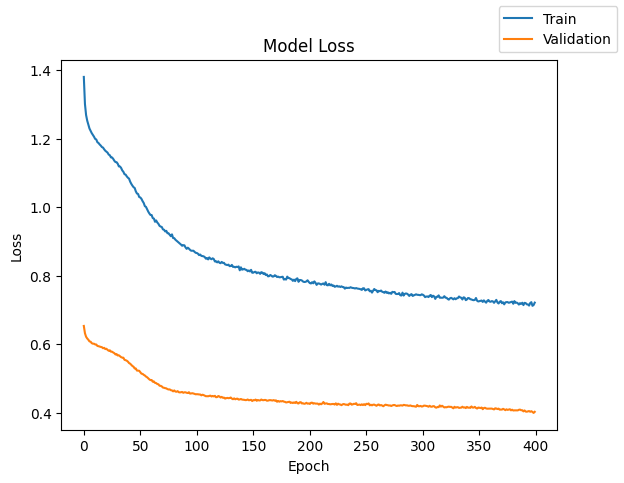

In [ ]:
#plot model's loss
plot(history, 'loss')

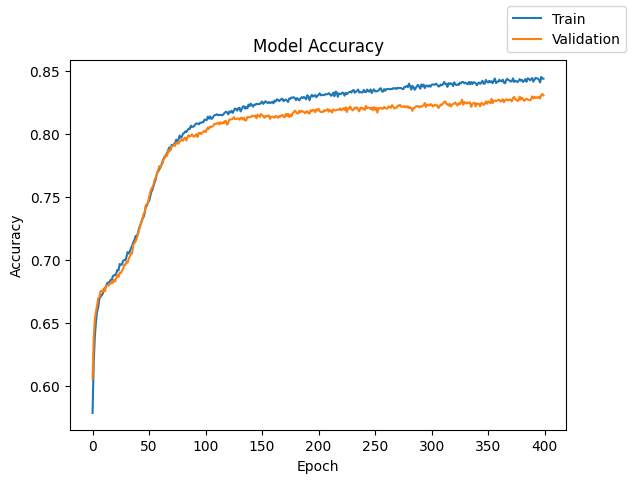

In [ ]:
#plot model's accuracy
plot(history,'accuracy')

In [ ]:
#generate accuracy score again
predictions_prob = model12.predict(X_val_scaled)

#round predictions to either 0 or 1
pred = (predictions_prob > 0.5).astype(int)

#compute accuracy again
acc = accuracy_score(pred, y_val)

874/874 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:


#compute accuracy again
acc = accuracy_score(pred, y_val)

In [ ]:
#add model to our results df
results.loc[12] = [
  "Neural Network", #model name
  "2", #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  optimizer, #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  ["Batch norm", "Dropout (0.2)", "Class weights"], #regularization
  history.history["val_loss"][-1], #val loss
  history.history["val_accuracy"][-1], #val accuracy
  "-" #test accuracy
  ]
results

model # hidden layers # neurons - hidden layer  \
1               Decision Tree               -                        -   
2   Decision Tree w/pre-prune               -                        -   
3                     Bagging               -                        -   
4                   ADA Boost               -                        -   
5              Gradient Boost               -                        -   
6               Random Forest               -                        -   
7                     XGBoost               -                        -   
8                Logistic Reg               -                        -   
9              Neural Network               1                       64   
11         XGBoost Fine-tuned               -                        -   
12             Neural Network               2                [64, 128]   

   activation function - hidden layer  # epochs batch size  \
1                                    -        -          -   
2                                    -        -          -   
3                                    -        -          -   
4                                    -        -          -   
5                                    -        -          -   
6                                    -        -          -   
7                                    -        -          -   
8                                    -        -          -   
9                                 relu       50        100   
11                                   -        -          -   
12                        [relu, relu]      400        100   

                                                    optimizer  \
1                                                           -   
2                                                           -   
3                                                           -   
4                                                           -   
5                                                           -   
6                                                           -   
7                                                           -   
8                                                           -   
9   <keras.src.optimizers.adam.Adam object at 0x7feeead81880>   
11                                                          -   
12  <keras.src.optimizers.adam.Adam object at 0x7feee8815d00>   

   learning rate, momentum weight initializer  \
1                        -                  -   
2                        -                  -   
3                        -                  -   
4                        -                  -   
5                        -                  -   
6                        -                  -   
7                        -                  -   
8                        -                  -   
9                        -                  -   
11                       -                  -   
12             [0.0001, -]    [Xav, Xav, Xav]   

                                regularization validation loss  \
1                                            -               -   
2                                            -               -   
3                                            -               -   
4                                            -               -   
5                                            -               -   
6                                            -               -   
7                                            -               -   
8                                            -               -   
9                                            -       45.708855   
11                                           -               -   
12  [Batch norm, Dropout (0.2), Class weights]        0.403092   

    validation accuracy test accuracy  
1              0.794441             -  
2              0.792151             -  
3              0.844704             -  
4              0.792151             -  
5              0.819805    

#Running models on test set

## Set up directory to export solution files

In [ ]:
import os

current_dir = os.getcwd()
print("Current working directory:", current_dir)

Current working directory: /content


In [ ]:
new_dir = "/content/drive/My Drive/AI Cert Course/Hackathons/Loan Default/"  # Replace with the actual path
os.chdir(new_dir)

In [ ]:
print("Current working directory:", new_dir)


Current working directory: /content/drive/My Drive/AI Cert Course/Hackathons/Loan Default/


In [ ]:
test_final.head()

onehot_encode__job_experience_6-10 years  \
0                                       0.0   
1                                       0.0   
2                                       1.0   
3                                       1.0   
4                                       0.0   

   onehot_encode__job_experience__5 Years  onehot_encode__loan_term_5 years  \
0                                     1.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     1.0                               0.0   

   onehot_encode__loan_grade_B  onehot_encode__loan_grade_C  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          1.0                          0.0   
4                          1.0                          0.0   

   onehot_encode__loan_grade_D  onehot_encode__loan_grade_E  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   onehot_encode__loan_grade_F  onehot_encode__loan_grade_G  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   onehot_encode__loan_subgrade_A2  ...  remainder__public_records  \
0                              0.0  ...                        0.0   
1                              0.0  ...                        0.0   
2                              0.0  ...                        1.0   
3                              0.0  ...                        0.0   
4                              0.0  ...                        0.0   

   remainder__total_acc  remainder__total_current_balance  \
0                  30.0                          128098.0   
1                  14.0                          269396.0   
2                  19.0                          220135.0   
3                  18.0                           39436.0   
4                  11.0                           52764.0   

   remainder__total_revolving_limit  remainder__loan_amnt  \
0                           25800.0                 12000   
1                           23600.0                 12000   
2                           34100.0                 15000   
3                           21700.0                 12000   
4                           12000.0                 20150   

   remainder__interest_rate  remainder__debt_to_income  \
0                     15.31                      14.62   
1                      7.26                      11.38   
2                     14.33                      28.15   
3                      9.99                      34.32   
4                     11.53                      26.74   

   remainder__revolving_balance  remainder__interest_receive  \
0                         22156                      2290.24   
1                          7592                       202.68   
2                         17983                      1166.24   
3                         12262                       635.06   
4                          8251                      1232.84   

   remainder__last_week_pay  
0                      87.0  
1                      13.0  
2                      30.0  
3                      35.0  
4                      31.0  

[5 rows x 114 columns]

In [ ]:
test_final.shape

(39933, 114)

## Model 1

In [ ]:
#predict with test
prediction1 = model1.predict(test_final)

In [ ]:
#see predictions
prediction1

In [ ]:
#create df with ids
solution_df1 = pd.DataFrame(test_raw['ID'])
solution_df1

In [ ]:
#add predictions to solution df
solution_df1['default'] = prediction1
solution_df1

### Exporting

In [ ]:
#export
solution_df1.to_csv('Submission1.csv',index=False)

Grade -- 0.7968848

In [ ]:
results.at[1, "test accuracy" ] = '0.7968848'
results

## Model 2

In [ ]:
#predict with test
prediction2 = model2.predict(test_final)

In [ ]:
#see predictions
prediction2

In [ ]:
#create df with ids
solution_df2 = pd.DataFrame(test_raw['ID'])
solution_df2

In [ ]:
#add predictions to solution df
solution_df2['default'] = prediction2
solution_df2

Grade -- 0.7913255

In [ ]:
results.at[2, "test accuracy" ] = '0.7913255'
results

### Exporting

In [ ]:
#export
solution_df2.to_csv('Submission2.csv',index=False)

## Model 3

In [ ]:
#predict with test
prediction3 = model3.predict(test_final)

In [ ]:
#see predictions
prediction3

In [ ]:
#create df with ids
solution_df3 = pd.DataFrame(test_raw['ID'])
solution_df3

In [ ]:
#add predictions to solution df
solution_df3['default'] = prediction3
solution_df3

### Exporting

In [ ]:
#export
solution_df3.to_csv('Submission3.csv',index=False)

Grade -- 0.8449152

In [ ]:
results.at[3, "test accuracy" ] = '0.8449152'
results

## Model 4

In [ ]:
#predict with test
prediction4 = model4.predict(test_final)

In [ ]:
#see predictions
prediction4

In [ ]:
#create df with ids
solution_df4 = pd.DataFrame(test_raw['ID'])
solution_df4

In [ ]:
#add predictions to solution df
solution_df4['default'] = prediction4
solution_df4

### Exporting

In [ ]:
#export
solution_df4.to_csv('Submission4.csv',index=False)

Grade -- 0.7913255


In [ ]:
results.at[4, "test accuracy" ] = '0.7913255'
results

## Model 5

In [ ]:
#predict with test
prediction5 = model5.predict(test_final)

In [ ]:
#see predictions
prediction5

In [ ]:
#create df with ids
solution_df5 = pd.DataFrame(test_raw['ID'])
solution_df5

In [ ]:
#add predictions to solution df
solution_df5['default'] = prediction5
solution_df5

### Exporting

In [ ]:
#export
solution_df5.to_csv('Submission5.csv',index=False)

Grade -- 0.8203992



In [ ]:
results.at[5, "test accuracy" ] = '0.8203992'
results

## Model 6

In [ ]:
#predict with test
prediction6 = model6.predict(test_final)

In [ ]:
#see predictions
prediction6

In [ ]:
#create df with ids
solution_df6 = pd.DataFrame(test_raw['ID'])
solution_df6

In [ ]:
#add predictions to solution df
solution_df6['default'] = prediction6
solution_df6

### Exporting

In [ ]:
#export
solution_df6.to_csv('Submission6.csv',index=False)

Grade -- 0.820299




In [ ]:
results.at[6, "test accuracy" ] = '0.820299'
results

## Model 7

In [ ]:
#predict with test
prediction7 = model7.predict(test_final)

In [ ]:
#see predictions
prediction7

In [ ]:
#create df with ids
solution_df7 = pd.DataFrame(test_raw['ID'])
solution_df7

In [ ]:
#add predictions to solution df
solution_df7['default'] = prediction7
solution_df7

### Exporting

In [ ]:
#export
solution_df7.to_csv('Submission7.csv',index=False)

Grade -- 0.8712343




In [ ]:
results.at[7, "test accuracy" ] = '0.8712343'
results

## Model 8

In [ ]:
#predict with test
prediction8 = model8.predict(test_final)

In [ ]:
#see predictions
prediction8

In [ ]:
#create df with ids
solution_df8 = pd.DataFrame(test_raw['ID'])
solution_df8

In [ ]:
#add predictions to solution df
solution_df8['default'] = prediction8
solution_df8

### Exporting

In [ ]:
#export
solution_df8.to_csv('Submission8.csv',index=False)

Grade -- 0.7732201




In [ ]:
results.at[8, "test accuracy" ] = '0.7732201'
results

## Model 9

In [ ]:
#predict with test
predictions_prob = model9.predict(test_final)

In [ ]:
prediction9 = (predictions_prob > 0.5).astype(int)

In [ ]:
#see predictions
prediction9

In [ ]:
#create df with ids
solution_df9 = pd.DataFrame(test_raw['ID'])
solution_df9

In [ ]:
#add predictions to solution df
solution_df9['default'] = prediction9
solution_df9

### Exporting

In [ ]:
#export
solution_df9.to_csv('Submission9.csv',index=False)

Grade -- 0.778529




In [ ]:
results.at[9, "test accuracy" ] = '0.778529'
results

## Model 10

In [ ]:
#predict with test
predictions_prob = model10.predict(test_final)

In [ ]:
prediction10 = (predictions_prob > 0.5).astype(int)

In [ ]:
#see predictions
prediction10

In [ ]:
#create df with ids
solution_df10 = pd.DataFrame(test_raw['ID'])
solution_df10

In [ ]:
#add predictions to solution df
solution_df10['default'] = prediction10
solution_df10

### Exporting

In [ ]:
#export
solution_df10.to_csv('Submission10.csv',index=False)

Grade --




In [ ]:
results.at[10, "test accuracy" ] = ''
results

## Model 11

In [ ]:
#predict with test
predictions_prob = model11.predict(test_final)

In [ ]:
prediction11 = (predictions_prob > 0.5).astype(int)

In [ ]:
#see predictions
prediction11

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
#create df with ids
solution_df11 = pd.DataFrame(test_raw['ID'])
solution_df11

ID
0       4855329
1      66862420
2       3637416
3      53682249
4      53937165
...         ...
39928  57779318
39929  59742362
39930  72657145
39931  15220189
39932  21810584

[39933 rows x 1 columns]

In [ ]:
#add predictions to solution df
solution_df11['default'] = prediction11
solution_df11

ID  default
0       4855329        1
1      66862420        0
2       3637416        1
3      53682249        0
4      53937165        0
...         ...      ...
39928  57779318        0
39929  59742362        0
39930  72657145        0
39931  15220189        0
39932  21810584        0

[39933 rows x 2 columns]

### Exporting

In [ ]:
#export
solution_df11.to_csv('Submission11.csv',index=False)

Grade --




In [ ]:
results.at[11, "test accuracy" ] = ''
results

## Model 12

In [ ]:
#transform the test dataset with the scaler
test_scaled = scaler.transform(test_final)

In [ ]:
#predict with test
predictions_prob = model12.predict(test_scaled)

1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
prediction12 = (predictions_prob > 0.5).astype(int)

In [ ]:
#see predictions
prediction12

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#create df with ids
solution_df12 = pd.DataFrame(test_raw['ID'])
solution_df12

ID
0       4855329
1      66862420
2       3637416
3      53682249
4      53937165
...         ...
39928  57779318
39929  59742362
39930  72657145
39931  15220189
39932  21810584

[39933 rows x 1 columns]

In [ ]:
#add predictions to solution df
solution_df12['default'] = prediction12
solution_df12

ID  default
0       4855329        1
1      66862420        0
2       3637416        1
3      53682249        0
4      53937165        0
...         ...      ...
39928  57779318        0
39929  59742362        0
39930  72657145        0
39931  15220189        0
39932  21810584        0

[39933 rows x 2 columns]

### Exporting

In [ ]:
#export
solution_df12.to_csv('Submission12.csv',index=False)

Grade --




In [ ]:
results.at[12, "test accuracy" ] = ''
results

model # hidden layers # neurons - hidden layer  \
1               Decision Tree               -                        -   
2   Decision Tree w/pre-prune               -                        -   
3                     Bagging               -                        -   
4                   ADA Boost               -                        -   
5              Gradient Boost               -                        -   
6               Random Forest               -                        -   
7                     XGBoost               -                        -   
8                Logistic Reg               -                        -   
9              Neural Network               1                       64   
11         XGBoost Fine-tuned               -                        -   
12             Neural Network               2                [64, 128]   

   activation function - hidden layer  # epochs batch size  \
1                                    -        -          -   
2                                    -        -          -   
3                                    -        -          -   
4                                    -        -          -   
5                                    -        -          -   
6                                    -        -          -   
7                                    -        -          -   
8                                    -        -          -   
9                                 relu       50        100   
11                                   -        -          -   
12                        [relu, relu]      400        100   

                                                    optimizer  \
1                                                           -   
2                                                           -   
3                                                           -   
4                                                           -   
5                                                           -   
6                                                           -   
7                                                           -   
8                                                           -   
9   <keras.src.optimizers.adam.Adam object at 0x7feeead81880>   
11                                                          -   
12  <keras.src.optimizers.adam.Adam object at 0x7feee8815d00>   

   learning rate, momentum weight initializer  \
1                        -                  -   
2                        -                  -   
3                        -                  -   
4                        -                  -   
5                        -                  -   
6                        -                  -   
7                        -                  -   
8                        -                  -   
9                        -                  -   
11                       -                  -   
12             [0.0001, -]    [Xav, Xav, Xav]   

                                regularization validation loss  \
1                                            -               -   
2                                            -               -   
3                                            -               -   
4                                            -               -   
5                                            -               -   
6                                            -               -   
7                                            -               -   
8                                            -               -   
9                                            -       45.708855   
11                                           -               -   
12  [Batch norm, Dropout (0.2), Class weights]        0.403092   

    validation accuracy test accuracy  
1              0.794441             -  
2              0.792151             -  
3              0.844704             -  
4              0.792151             -  
5              0.819805    